## Data Curator | Feature Analysts Project 

In [200]:
# Import python libraries

import pandas as pd 
from pathlib import Path
%matplotlib inline
import hvplot.pandas
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas
from path import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [201]:
# A purpose specific Function to clean and prep the dataframe  

def clean_data(df):
    """Returns df with Columns ['SimFinId', 'Currency'] drop with .drop funtion
      
       .dropped function grouped by ['Ticker','Fiscal Year']  as type int
           Divides values to turn into percentages 
       """
    
    df.drop(['SimFinId', 'Currency'], inplace= True, errors='ignore', axis=1)
    df = df.groupby(['Ticker','Fiscal Year']).mean().dropna().astype(int)
   
    return df /1000000000


In [202]:
""" A purpose specific Function to calculate 'Market Cap' and return the dataframe  
        returns a dataframe with colum holding % change of said ratio
"""

def marketcap(df):
     
    shares_outstanding = list(df.index.get_level_values('Shares (Diluted)'))
    prices = list(df['Close'])
    market_cap = []
    for idx, price in enumerate(prices):
        market_cap.append(prices[idx] * shares_outstanding[idx])
    df['Market Cap'] = pd.Series({'Market Cap' : market_cap}) 
    return df



In [203]:
""" A purpose specific Function to calculate 'Return on Capital'and return the dataframe  
        returns a dataframe with colum holding % change of said ratio
"""

def return_on_cap(df):
    """Returns a Pandas DataFrame with a column holding the % change value of our return on capital
    DataFrame['Column Name'] - DataFrame['Column Name']

    
    
    """
    df['ROC'] = df['Total Current Assets'] - df['Total Current Liabilities']
    return pd.DataFrame(data=df['ROC']).pct_change().dropna()



In [204]:
# A purpose specific Function to merge two realted datframes and returns dataframe

def merge_df(df1_one, df_two):
    """ Returns df1_one merged with df_two 
         on=['Ticker','Fiscal Year']
    """
    
    df_ret = pd.DataFrame()
    df_ret  = df1_one.merge(df_two, on=['Ticker','Fiscal Year'])
    return df_ret



In [205]:
"""A purpose specific Function to calculate the book price value and returns dataframe
    returns a dataframe with colum holding % change of said ratio

"""

def make_book_price(df):
    """Returns a Pandas DataFrame with a column holding the % change value of our price to book
    DataFrame['Column Name'] - DataFrame['Column Name']
    """
    
    df["book_price"] = df['Total Current Assets'] / df['Shares (Diluted)']
    return  pd.DataFrame(data=df['book_price']).pct_change().dropna()



In [206]:
""" A purpose specific Function to calculate 'experimental' ratio 
    returns a dataframe with colum holding % change of said ratio
"""

def Not_ncavps(df):
    df['jncavps'] = df['Total Current Assets'] - (df['Total Liabilities'] + df['Share Capital & Additional Paid-In Capital']) / df['Shares (Diluted)']
    """Returns a Pandas DataFrame with a column holding the % change value of our jncavps score
    DataFrame['Column Name'] - DataFrame['Column Name']
    
    """
    return pd.DataFrame(data=df['jncavps']).pct_change().dropna()



In [207]:
isolated_companies_full_data.reset_index().hvplot.bar(
    x='Fiscal Year',
    y ='Long Term Debt',
    by='Ticker',
    rot=90,
    figsize=(12,6),
    grid=True,
    title="Displays (balance_sheet_cash_equal) Data per Company")

:Bars   [Fiscal Year,Ticker]   (Long Term Debt)

<AxesSubplot:ylabel='Ticker-Fiscal Year'>

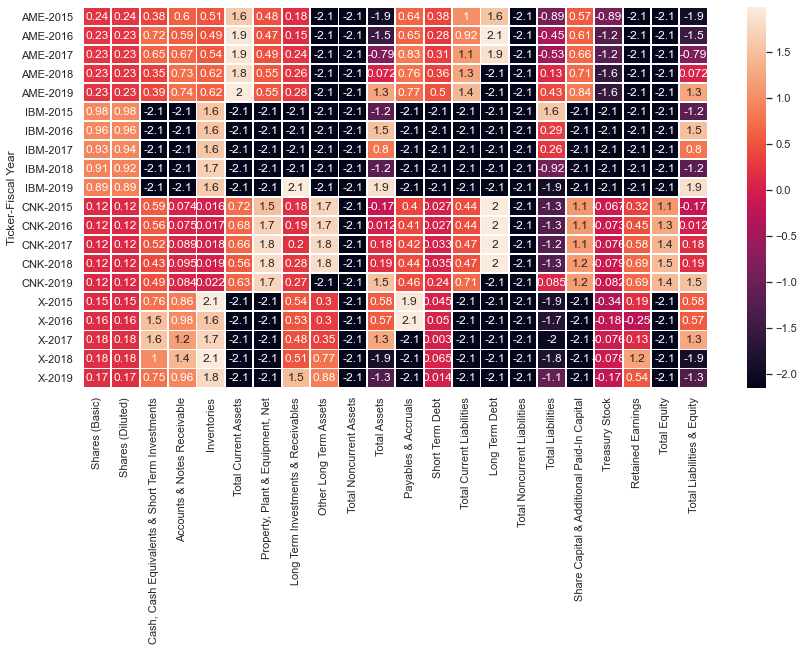

In [91]:
f, ax = plt.subplots(figsize=(14, 7))
sns.heatmap(isolated_companies_full_data, annot=True, linewidths=.9, ax=ax, robust=True)

## Data Curator

In [62]:
"""Import the data by reading in the CSV file and setting the DatetimeIndex 
    
    DatetimeIndex using the parse_dates and infer_datetime_format parameters"""


us_balance_annual = pd.read_csv(
    Path('us-balance-annual.csv'),
    parse_dates=True,
    infer_datetime_format=True,
    delimiter=';')

us_balance_annual


,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Treasury Stock,Retained Earnings,Total Equity,Total Liabilities & Equity
0,A,45846,USD,2008,Q4,2008-10-31,2008-12-19,2009-12-21,363000000.0,371000000.0,...,NaN,1.330000e+09,2.125000e+09,3.118000e+09,4448000000,7.416000e+09,-7.470000e+09,2.791000e+09,2.559000e+09,7007000000
1,A,45846,USD,2009,Q4,2009-10-31,2009-12-21,2010-12-20,346000000.0,346000000.0,...,1.000000e+06,1.123000e+09,2.904000e+09,3.975000e+09,5098000000,7.558000e+09,-7.627000e+09,2.760000e+09,2.514000e+09,7612000000
2,A,45846,USD,2010,Q4,2010-10-31,2010-12-20,2011-12-16,347000000.0,353000000.0,...,1.501000e+09,3.083000e+09,2.190000e+09,3.377000e+09,6460000000,7.910000e+09,-8.038000e+09,3.444000e+09,3.236000e+09,9696000000
3,A,45846,USD,2011,Q4,2011-10-31,2011-12-16,2012-12-20,347000000.0,355000000.0,...,2.530000e+08,1.837000e+09,1.932000e+09,2.904000e+09,4741000000,8.271000e+09,-8.535000e+09,4.456000e+09,4.316000e+09,9057000000
4,A,45846,USD,2012,Q4,2012-10-31,2012-12-20,2013-12-19,348000000.0,353000000.0,...,2.500000e+08,1.893000e+09,2.112000e+09,3.458000e+09,5351000000,8.495000e+09,-8.707000e+09,5.505000e+09,5.185000e+09,10536000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19250,ZYXI,171401,USD,2015,Q4,2015-12-31,2016-03-31,2017-04-17,31271234.0,31271234.0,...,1.090000e+05,7.539000e+06,2.160000e+05,2.280000e+05,7767000,5.863000e+06,NaN,-9.845000e+06,-4.071000e+06,3696000
19251,ZYXI,171401,USD,2016,Q4,2016-12-31,2017-04-18,2018-02-28,31271234.0,31271234.0,...,1.180000e+05,7.745000e+06,1.360000e+05,1.480000e+05,7893000,6.063000e+06,0.000000e+00,-9.776000e+06,-3.802000e+06,4091000
19252,ZYXI,171401,USD,2017,Q4,2017-12-31,2018-02-28,2018-08-02,32156000.0,33196000.0,...,3.540000e+05,4.015000e+06,NaN,1.200000e+04,4027000,7.645000e+06,-2.430000e+05,-2.411000e+06,4.902000e+06,8929000
19253,ZYXI,171401,USD,2018,Q4,2018-12-31,2019-02-26,2019-04-30,32503000.0,34043000.0,...,NaN,6.983000e+06,2.967000e+06,2.977000e+06,9960000,8.191000e+06,-3.675000e+06,4.864000e+06,9.291000e+06,19251000


In [63]:
# makes use of our "clean_data function"

us_balance_annual = clean_data(us_balance_annual)
us_balance_annual


Shares (Basic)  Shares (Diluted)  \
Ticker Fiscal Year                                     
A      2009               0.346000          0.346000   
       2010               0.347000          0.353000   
       2011               0.347000          0.355000   
       2012               0.348000          0.353000   
       2016               0.326000          0.329000   
...                            ...               ...   
XRX    2012               0.325513          0.332296   
       2013               0.306372          0.318382   
       2014               0.288591          0.292899   
       2018               0.248707          0.251660   
ZAGG   2012               0.030339          0.031656   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
A      2009                                               -2.147484   
       2010                                               -2.147484   
       2011                                               -2.147484   
       2012                                               -2.147484   
       2016                                               -2.147484   
...                                                             ...   
XRX    2012                                                1.246000   
       2013                                                1.764000   
       2014                                                1.411000   
       2018                                                1.084000   
ZAGG   2012                                                0.020177   

                    Accounts & Notes Receivable  Inventories  \
Ticker Fiscal Year                                             
A      2009                            0.595000     0.552000   
       2010                            0.869000     0.716000   
       2011                            0.860000     0.898000   
       2012                            0.923000     1.014000   
       2016                            0.631000     0.533000   
...                                         ...          ...   
XRX    2012                           -2.147484     1.011000   
       2013                           -2.147484     0.998000   
       2014                           -2.147484     0.934000   
       2018                            1.276000     0.818000   
ZAGG   2012                            0.054561     0.039988   

                    Total Current Assets  Property, Plant & Equipment, Net  \
Ticker Fiscal Year                                                           
A      2009                    -2.147484                          0.845000   
       2010                    -2.147484                          0.980000   
       2011                    -2.147484                          1.006000   
       2012                    -2.147484                          1.164000   
       2016                    -2.147484                          0.639000   
...                                  ...                               ...   
XRX    2012                    -2.147484                          2.091000   
       2013                    -2.147484                          2.025000   
       2014                    -2.147484                          1.648000   
       2018                    -2.147484                          0.941000   
ZAGG   2012                     0.131185                          0.004862   

                    Long Term Investments & Receivables  \
Ticker Fiscal Year                                        
A      2009                                    0.163000   
       2010                                    0.142000   
       2011                                    0.117000   
       2012                                    0.109000   
       2016                                    0.135000   
...                                                 ...   
XRX    2012                                    

In [64]:
"""Use 'index.get.level_values' to extract time frame desired for comparisons.
        

    Parameters
levelint or str
It is either the integer position or the name of the level.

Returns
Index
Calling object, as there is only one level in the Index.

"""

mask = us_balance_annual.index.get_level_values(level=1) > 2014 | (us_balance_annual.index.get_level_values(level=1) == 2018)
us_balance_annual_ = us_balance_annual.loc[mask]
us_balance_annual_


Shares (Basic)  Shares (Diluted)  \
Ticker Fiscal Year                                     
A      2016               0.326000          0.329000   
ABBV   2015               1.625000          1.637000   
       2016               1.622000          1.631000   
       2017               1.596000          1.603000   
       2018               1.541000          1.546000   
...                            ...               ...   
XOM    2016              -2.147484         -2.147484   
       2017              -2.147484         -2.147484   
       2018              -2.147484         -2.147484   
       2019              -2.147484         -2.147484   
XRX    2018               0.248707          0.251660   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
A      2016                                               -2.147484   
ABBV   2015                                               -2.147484   
       2016                                               -2.147484   
       2017                                               -2.147484   
       2018                                               -2.147484   
...                                                             ...   
XOM    2016                                               -2.147484   
       2017                                               -2.147484   
       2018                                               -2.147484   
       2019                                               -2.147484   
XRX    2018                                                1.084000   

                    Accounts & Notes Receivable  Inventories  \
Ticker Fiscal Year                                             
A      2016                            0.631000     0.533000   
ABBV   2015                           -2.147484     1.719000   
       2016                           -2.147484     1.444000   
       2017                           -2.147484     1.605000   
       2018                           -2.147484     1.605000   
...                                         ...          ...   
XOM    2016                           -2.147484    -2.147484   
       2017                           -2.147484    -2.147484   
       2018                           -2.147484    -2.147484   
       2019                           -2.147484    -2.147484   
XRX    2018                            1.276000     0.818000   

                    Total Current Assets  Property, Plant & Equipment, Net  \
Ticker Fiscal Year                                                           
A      2016                    -2.147484                          0.639000   
ABBV   2015                    -2.147484                         -2.147484   
       2016                    -2.147484                         -2.147484   
       2017                    -2.147484                         -2.147484   
       2018                    -2.147484                         -2.147484   
...                                  ...                               ...   
XOM    2016                    -2.147484                         -2.147484   
       2017                    -2.147484                         -2.147484   
       2018                    -2.147484                         -2.147484   
       2019                    -2.147484                         -2.147484   
XRX    2018                    -2.147484                          0.941000   

                    Long Term Investments & Receivables  \
Ticker Fiscal Year                                        
A      2016                                    0.135000   
ABBV   2015                                    0.145000   
       2016                                    1.783000   
       2017                                    2.090000   
       2018                                    1.420000   
...                                                 ...   
XOM    2016                                   -

In [65]:
""" Creates a dateframe displaying "Total Current Assets" for our choosen companies
        for the desired time length.
"""

isolated_companies_full_data = us_balance_annual_.loc[['AME','IBM','CNK','X']]

isolated_companies_full_data.head()

Shares (Basic)  Shares (Diluted)  \
Ticker Fiscal Year                                     
AME    2015               0.239906          0.241586   
       2016               0.232593          0.233730   
       2017               0.230229          0.231845   
       2018               0.230823          0.232712   
       2019               0.227759          0.229395   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
AME    2015                                                0.381005   
       2016                                                0.717259   
       2017                                                0.646300   
       2018                                                0.353975   
       2019                                                0.393030   

                    Accounts & Notes Receivable  Inventories  \
Ticker Fiscal Year                                             
AME    2015                            0.603295     0.514451   
       2016                            0.592326     0.492104   
       2017                            0.668176     0.540504   
       2018                            0.732839     0.624744   
       2019                            0.744760     0.624567   

                    Total Current Assets  Property, Plant & Equipment, Net  \
Ticker Fiscal Year                                                           
AME    2015                     1.618827                          0.484548   
       2016                     1.928190                          0.473230   
       2017                     1.934655                          0.493296   
       2018                     1.836144                          0.554130   
       2019                     2.025771                          0.548908   

                    Long Term Investments & Receivables  \
Ticker Fiscal Year                                        
AME    2015                                    0.177481   
       2016                                    0.146283   
       2017                                    0.239129   
       2018                                    0.256210   
       2019                                    0.279790   

                    Other Long Term Assets  Total Noncurrent Assets  ...  \
Ticker Fiscal Year                                                   ...   
AME    2015                      -2.147484                -2.147484  ...   
       2016                      -2.147484                -2.147484  ...   
       2017                      -2.147484                -2.147484  ...   
       2018                      -2.147484                -2.147484  ...   
       2019                      -2.147484                -2.147484  ...   

                    Short Term Debt  Total Current Liabilities  \
Ticker Fiscal Year                                               
AME    2015                0.384924                   1.024021   
       2016                0.278921                   0.924441   
       2017                0.308123                   1.138663   
       2018                0.358876                   1.258704   
       2019                0.497449                   1.425858   

                    Long Term Debt  Total Noncurrent Liabilities  \
Ticker Fiscal Year                                                 
AME    2015               1.553116                     -2.147484   
       2016               2.062644                     -2.147484   
       2017               1.866166                     -2.147484   
       2018              -2.147484                     -2.147484   
       2019              -2.147484                     -2.147484   

                    Total Liabilities  \
Ticker Fiscal Year                      
AME    2015                 -0.889143   
       2016                 -0.450806   
       2017                 -0.526536   
       2018                  0.125399   


In [66]:
scaled_data = StandardScaler().fit_transform(isolated_companies_full_data)

In [67]:
scaled_data

array([[-0.36599655, -0.36383235,  0.30179722,  0.54544228, -0.65118872,
         1.17335069,  0.59255988,  0.18802734, -0.87303573, -1.        ,
        -1.64908832,  0.66642753,  0.79708697,  1.11417654,  1.1670434 ,
        -1.        , -0.12025126,  0.77365848,  0.04071179, -0.9800714 ,
        -0.5768029 , -1.64969296],
       [-0.38795921, -0.3873105 ,  0.5651404 ,  0.53666999, -0.68073983,
         1.34928363,  0.58585518,  0.16089456, -0.87303573, -1.        ,
        -1.27202329,  0.67067123,  0.69192687,  1.04822956,  1.42864006,
        -1.        ,  0.34041137,  0.79697696, -0.33606586, -0.9800714 ,
        -0.5768029 , -1.27245049],
       [-0.39505886, -0.39294394,  0.50956762,  0.59732984, -0.61673689,
         1.35296024,  0.59774213,  0.24164237, -0.87303573, -1.        ,
        -0.67640094,  0.79291465,  0.72089666,  1.19009836,  1.32776633,
        -1.        ,  0.26082425,  0.83388639, -0.33328834, -0.9800714 ,
        -0.5768029 , -0.67654786],
       [-0.39327494

In [72]:
# Create a DataFrame with the scaled data
df_isolated_companies_full_data_scaled_algo = pd.DataFrame(
    scaled_data,
    columns=isolated_companies_full_data.columns
)

# Copy the crypto names from the original data
df_isolated_companies_full_data_scaled_algo["Ticker"] = isolated_companies_full_data.index.get_level_values(level=0)

# Set the coinid column as index
df_isolated_companies_full_data_scaled_algo = df_isolated_companies_full_data_scaled_algo.set_index("Ticker")

# Display sample data
df_isolated_companies_full_data_scaled_algo

,Shares (Basic),Shares (Diluted),"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,...,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Treasury Stock,Retained Earnings,Total Equity,Total Liabilities & Equity
Ticker,,,,,,,,,,,,,,,,,,,,,
AME,-0.365997,-0.363832,0.301797,0.545442,-0.651189,1.173351,0.592560,0.188027,-0.873036,-1.0,...,0.797087,1.114177,1.167043,-1.0,-0.120251,0.773658,0.040712,-0.980071,-0.576803,-1.649693
AME,-0.387959,-0.387310,0.565140,0.536670,-0.680740,1.349284,0.585855,0.160895,-0.873036,-1.0,...,0.691927,1.048230,1.428640,-1.0,0.340411,0.796977,-0.336066,-0.980071,-0.576803,-1.272450
AME,-0.395059,-0.392944,0.509568,0.597330,-0.616737,1.352960,0.597742,0.241642,-0.873036,-1.0,...,0.720897,1.190098,1.327766,-1.0,0.260824,0.833886,-0.333288,-0.980071,-0.576803,-0.676548
AME,-0.393275,-0.390353,0.280628,0.649043,-0.505340,1.296938,0.633780,0.256498,-0.873036,-1.0,...,0.771246,1.269596,-0.732881,-1.0,0.945964,0.863703,-0.750435,-0.980071,-0.576803,0.065748
AME,-0.402477,-0.400266,0.311215,0.658577,-0.505574,1.404777,0.630686,0.277005,-0.873036,-1.0,...,0.908717,1.380294,-0.732881,-1.0,1.270388,0.945692,-0.755380,-0.980071,-0.576803,1.078875
IBM,1.852909,1.851034,-1.678433,-1.654450,0.719518,-0.968528,-0.966636,-1.833986,-0.873036,-1.0,...,-1.715184,-0.986157,-0.732881,-1.0,2.477510,-0.993808,-1.417431,-0.980071,-0.576803,-1.002422
IBM,1.782868,1.779350,-1.678433,-1.654450,0.722162,-0.968528,-0.966636,-1.833986,-0.873036,-1.0,...,-1.715184,-0.986157,-0.732881,-1.0,1.120790,-0.993808,-1.417431,-0.980071,-0.576803,1.292473
IBM,1.715012,1.715608,-1.678433,-1.654450,0.761834,-0.968528,-0.966636,-1.833986,-0.873036,-1.0,...,-1.715184,-0.986157,-0.732881,-1.0,1.084076,-0.993808,-1.417431,-0.980071,-0.576803,0.690105
IBM,1.652604,1.652639,-1.678433,-1.654450,0.892749,-0.968528,-0.966636,-1.833986,-0.873036,-1.0,...,-1.715184,-0.986157,-0.732881,-1.0,-0.153922,-0.993808,-1.417431,-0.980071,-0.576803,-0.999767


In [73]:
# Initialize the K-Means model with four clusters
# YOUR CODE HERE!
kmodel = KMeans(n_clusters=4, random_state=1)

In [75]:
kmodel.fit(df_isolated_companies_full_data_scaled_algo)

KMeans(n_clusters=4, random_state=1)

In [77]:
# Predict the clusters to group the cryptocurrencies using the scaled data
data_scaled_algo_clusters_k4 = kmodel.predict(df_isolated_companies_full_data_scaled_algo)

# View the resulting array of cluster values.
print(data_scaled_algo_clusters_k4)

[1 1 1 1 1 0 0 0 0 0 3 3 3 3 3 2 2 2 2 2]


In [80]:
# Note: The code for this step is provided for you.

# Add a new column to the DataFrame with the predicted clusters with k=4
df_isolated_companies_full_data_scaled_algo["cluster_k44"] = data_scaled_algo_clusters_k4
df_isolated_companies_full_data_scaled_algo

,Shares (Basic),Shares (Diluted),"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,...,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Treasury Stock,Retained Earnings,Total Equity,Total Liabilities & Equity,cluster_k4,cluster_k44
Ticker,,,,,,,,,,,,,,,,,,,,,
AME,-0.365997,-0.363832,0.301797,0.545442,-0.651189,1.173351,0.592560,0.188027,-0.873036,-1.0,...,1.167043,-1.0,-0.120251,0.773658,0.040712,-0.980071,-0.576803,-1.649693,1,1
AME,-0.387959,-0.387310,0.565140,0.536670,-0.680740,1.349284,0.585855,0.160895,-0.873036,-1.0,...,1.428640,-1.0,0.340411,0.796977,-0.336066,-0.980071,-0.576803,-1.272450,1,1
AME,-0.395059,-0.392944,0.509568,0.597330,-0.616737,1.352960,0.597742,0.241642,-0.873036,-1.0,...,1.327766,-1.0,0.260824,0.833886,-0.333288,-0.980071,-0.576803,-0.676548,1,1
AME,-0.393275,-0.390353,0.280628,0.649043,-0.505340,1.296938,0.633780,0.256498,-0.873036,-1.0,...,-0.732881,-1.0,0.945964,0.863703,-0.750435,-0.980071,-0.576803,0.065748,1,1
AME,-0.402477,-0.400266,0.311215,0.658577,-0.505574,1.404777,0.630686,0.277005,-0.873036,-1.0,...,-0.732881,-1.0,1.270388,0.945692,-0.755380,-0.980071,-0.576803,1.078875,1,1
IBM,1.852909,1.851034,-1.678433,-1.654450,0.719518,-0.968528,-0.966636,-1.833986,-0.873036,-1.0,...,-0.732881,-1.0,2.477510,-0.993808,-1.417431,-0.980071,-0.576803,-1.002422,0,0
IBM,1.782868,1.779350,-1.678433,-1.654450,0.722162,-0.968528,-0.966636,-1.833986,-0.873036,-1.0,...,-0.732881,-1.0,1.120790,-0.993808,-1.417431,-0.980071,-0.576803,1.292473,0,0
IBM,1.715012,1.715608,-1.678433,-1.654450,0.761834,-0.968528,-0.966636,-1.833986,-0.873036,-1.0,...,-0.732881,-1.0,1.084076,-0.993808,-1.417431,-0.980071,-0.576803,0.690105,0,0
IBM,1.652604,1.652639,-1.678433,-1.654450,0.892749,-0.968528,-0.966636,-1.833986,-0.873036,-1.0,...,-0.732881,-1.0,-0.153922,-0.993808,-1.417431,-0.980071,-0.576803,-0.999767,0,0


In [81]:
# Display sample data
df_isolated_companies_full_data_scaled = df_isolated_companies_full_data_scaled_algo
df_isolated_companies_full_data_scaled.hvplot.scatter(x='Long Term Debt', y='Total Current Assets', by='cluster_k44',
                                                      hover_cols=["Ticker"],
                                                      marker=["hex", "square", "inverted_triangle", "triangle"],
)

:NdOverlay   [cluster_k44]
   :Scatter   [Long Term Debt]   (Total Current Assets,Ticker)

In [37]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

In [38]:
# Create an empy list to store the inertia values
inertia = []

In [39]:
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inirtia list
# YOUR CODE HERE!
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_isolated_companies_full_data_scaled)
    inertia.append(k_model.inertia_)

C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


In [40]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [41]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# YOUR CODE HERE!
df_elbow.hvplot.line(
       x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

In [42]:
# Create a PCA model instance and set `n_components=3`.
# YOUR CODE HERE!
pca=PCA(n_components=3)

In [43]:
df_isolated_companies_full_data_scaled

,Shares (Basic),Shares (Diluted),"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,...,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Treasury Stock,Retained Earnings,Total Equity,Total Liabilities & Equity,cluster_k4
0,-0.365997,-0.363832,0.301797,0.545442,-0.651189,1.173351,0.592560,0.188027,-0.873036,-1.0,...,1.114177,1.167043,-1.0,-0.120251,0.773658,0.040712,-0.980071,-0.576803,-1.649693,1
1,-0.387959,-0.387310,0.565140,0.536670,-0.680740,1.349284,0.585855,0.160895,-0.873036,-1.0,...,1.048230,1.428640,-1.0,0.340411,0.796977,-0.336066,-0.980071,-0.576803,-1.272450,1
2,-0.395059,-0.392944,0.509568,0.597330,-0.616737,1.352960,0.597742,0.241642,-0.873036,-1.0,...,1.190098,1.327766,-1.0,0.260824,0.833886,-0.333288,-0.980071,-0.576803,-0.676548,1
3,-0.393275,-0.390353,0.280628,0.649043,-0.505340,1.296938,0.633780,0.256498,-0.873036,-1.0,...,1.269596,-0.732881,-1.0,0.945964,0.863703,-0.750435,-0.980071,-0.576803,0.065748,1
4,-0.402477,-0.400266,0.311215,0.658577,-0.505574,1.404777,0.630686,0.277005,-0.873036,-1.0,...,1.380294,-0.732881,-1.0,1.270388,0.945692,-0.755380,-0.980071,-0.576803,1.078875,1
5,1.852909,1.851034,-1.678433,-1.654450,0.719518,-0.968528,-0.966636,-1.833986,-0.873036,-1.0,...,-0.986157,-0.732881,-1.0,2.477510,-0.993808,-1.417431,-0.980071,-0.576803,-1.002422,0
6,1.782868,1.779350,-1.678433,-1.654450,0.722162,-0.968528,-0.966636,-1.833986,-0.873036,-1.0,...,-0.986157,-0.732881,-1.0,1.120790,-0.993808,-1.417431,-0.980071,-0.576803,1.292473,0
7,1.715012,1.715608,-1.678433,-1.654450,0.761834,-0.968528,-0.966636,-1.833986,-0.873036,-1.0,...,-0.986157,-0.732881,-1.0,1.084076,-0.993808,-1.417431,-0.980071,-0.576803,0.690105,0
8,1.652604,1.652639,-1.678433,-1.654450,0.892749,-0.968528,-0.966636,-1.833986,-0.873036,-1.0,...,-0.986157,-0.732881,-1.0,-0.153922,-0.993808,-1.417431,-0.980071,-0.576803,-0.999767,0
9,1.578085,1.582401,-1.678433,-1.654450,0.809439,-0.968528,-0.966636,1.837423,-0.873036,-1.0,...,-0.986157,-0.732881,-1.0,-1.227769,-0.993808,-1.417431,-0.980071,-0.576803,1.597765,0


In [44]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
# YOUR CODE HERE!

scaled_data_pca_data = pca.fit_transform(df_isolated_companies_full_data_scaled)

# View the first five rows of the DataFrame. 
scaled_data_pca_data[:5]

array([[-1.48879342, -2.02645639,  2.75655642],
       [-1.4413997 , -2.31576471,  2.43828196],
       [-1.47044306, -2.28095848,  1.85160948],
       [-0.79279755, -2.16205189,  1.04128601],
       [-0.80473663, -2.30512455,  0.04872901]])

In [45]:
pca.explained_variance_ratio_

array([0.50609085, 0.20567483, 0.11563613])

In [46]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
scaled_data_pca_data = pd.DataFrame(
    scaled_data_pca_data, 
    columns=["PC1", "PC2", "PC3"]
)

# Copy the crypto names from the original data
scaled_data_pca_data["Ticker"] = df_isolated_companies_full_data_scaled.index

# Set the coinid column as index
scaled_data_pca_data = scaled_data_pca_data.set_index("Ticker")

# Display sample data
scaled_data_pca_data.head()

,PC1,PC2,PC3
Ticker,,,
0,-1.488793,-2.026456,2.756556
1,-1.441400,-2.315765,2.438282
2,-1.470443,-2.280958,1.851609
3,-0.792798,-2.162052,1.041286
4,-0.804737,-2.305125,0.048729


In [84]:
# Initiate a new  K-Means algorithm using the PCA DataFrame to group 
# the cryptocurrencies. Set the `n_components` parameter equal to 
# the best value for `k` found before. View the resulting array. 

# Initialize the K-Means model
# YOUR CODE HERE!
second_model4 = KMeans(n_clusters=4, random_state=1)

# Fit the model
# YOUR CODE HERE!
second_model4.fit(scaled_data_pca_data)
# Predict clusters
second_model4 = second_model4.predict(scaled_data_pca_data)
# YOUR CODE HERE!

# View the resulting array
second_model4

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2])

In [ ]:
scatter_plotfin = second_model4.hvplot().scatter()

In [243]:
scaled_data_pca_data['model4'] = second_model4
scaled_data_pca_data.index = slicedf.index

In [244]:
scaled_data_pca_data

,PC1,PC2,PC3,model4
Ticker,,,,
AME,-1.488793,-2.026456,2.756556,1
AME,-1.441400,-2.315765,2.438282,1
AME,-1.470443,-2.280958,1.851609,1
AME,-0.792798,-2.162052,1.041286,1
AME,-0.804737,-2.305125,0.048729,1
IBM,5.600188,-1.370708,0.681782,0
IBM,5.563508,-0.804072,-1.707554,0
IBM,5.487249,-0.796124,-1.066922,0
IBM,5.217911,-0.420880,0.684690,0


In [235]:
slicedf = df_isolated_companies_full_data_scaled[['Total Equity','Retained Earnings']]
slicedf

,Total Equity,Retained Earnings
Ticker,,
AME,-0.576803,-0.980071
AME,-0.576803,-0.980071
AME,-0.576803,-0.980071
AME,-0.576803,-0.980071
AME,-0.576803,-0.980071
IBM,-0.576803,-0.980071
IBM,-0.576803,-0.980071
IBM,-0.576803,-0.980071
IBM,-0.576803,-0.980071


In [248]:


mask = us_balance_annual.index.get_level_values(level=1) > 2014 | (us_balance_annual.index.get_level_values(level=1) == 2018)
us_balance_annual_ = us_balance_annual.loc[mask]
us_balance_annual_

Shares (Basic)  Shares (Diluted)  \
Ticker Fiscal Year                                     
A      2016               0.326000          0.329000   
ABBV   2015               1.625000          1.637000   
       2016               1.622000          1.631000   
       2017               1.596000          1.603000   
       2018               1.541000          1.546000   
...                            ...               ...   
XOM    2016              -2.147484         -2.147484   
       2017              -2.147484         -2.147484   
       2018              -2.147484         -2.147484   
       2019              -2.147484         -2.147484   
XRX    2018               0.248707          0.251660   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
A      2016                                               -2.147484   
ABBV   2015                                               -2.147484   
       2016                                               -2.147484   
       2017                                               -2.147484   
       2018                                               -2.147484   
...                                                             ...   
XOM    2016                                               -2.147484   
       2017                                               -2.147484   
       2018                                               -2.147484   
       2019                                               -2.147484   
XRX    2018                                                1.084000   

                    Accounts & Notes Receivable  Inventories  \
Ticker Fiscal Year                                             
A      2016                            0.631000     0.533000   
ABBV   2015                           -2.147484     1.719000   
       2016                           -2.147484     1.444000   
       2017                           -2.147484     1.605000   
       2018                           -2.147484     1.605000   
...                                         ...          ...   
XOM    2016                           -2.147484    -2.147484   
       2017                           -2.147484    -2.147484   
       2018                           -2.147484    -2.147484   
       2019                           -2.147484    -2.147484   
XRX    2018                            1.276000     0.818000   

                    Total Current Assets  Property, Plant & Equipment, Net  \
Ticker Fiscal Year                                                           
A      2016                    -2.147484                          0.639000   
ABBV   2015                    -2.147484                         -2.147484   
       2016                    -2.147484                         -2.147484   
       2017                    -2.147484                         -2.147484   
       2018                    -2.147484                         -2.147484   
...                                  ...                               ...   
XOM    2016                    -2.147484                         -2.147484   
       2017                    -2.147484                         -2.147484   
       2018                    -2.147484                         -2.147484   
       2019                    -2.147484                         -2.147484   
XRX    2018                    -2.147484                          0.941000   

                    Long Term Investments & Receivables  \
Ticker Fiscal Year                                        
A      2016                                    0.135000   
ABBV   2015                                    0.145000   
       2016                                    1.783000   
       2017                                    2.090000   
       2018                                    1.420000   
...                                                 ...   
XOM    2016                                   -

In [256]:
nei = slicedf.merge(scaled_data_pca_data, how='outer', left_index=True, right_index=True)
nei

,Total Equity,Retained Earnings,PC1,PC2,PC3,model4
Ticker,,,,,,
AME,-0.576803,-0.980071,-1.488793,-2.026456,2.756556,1
AME,-0.576803,-0.980071,-1.441400,-2.315765,2.438282,1
AME,-0.576803,-0.980071,-1.470443,-2.280958,1.851609,1
AME,-0.576803,-0.980071,-0.792798,-2.162052,1.041286,1
AME,-0.576803,-0.980071,-0.804737,-2.305125,0.048729,1
...,...,...,...,...,...,...
X,-0.576803,1.046067,-0.533417,3.159595,0.144891,2
X,-0.576803,1.046067,-0.819025,2.928204,0.218243,2
X,-0.576803,1.046067,-0.260939,3.578942,-0.529959,2


In [259]:
nei.hvplot.scatter(x='Retained Earnings',
                  y='Total Equity',
                  by='model4',
                  hover_cols=['Ticker'])

:NdOverlay   [model4]
   :Scatter   [Retained Earnings]   (Total Equity,Ticker)

C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


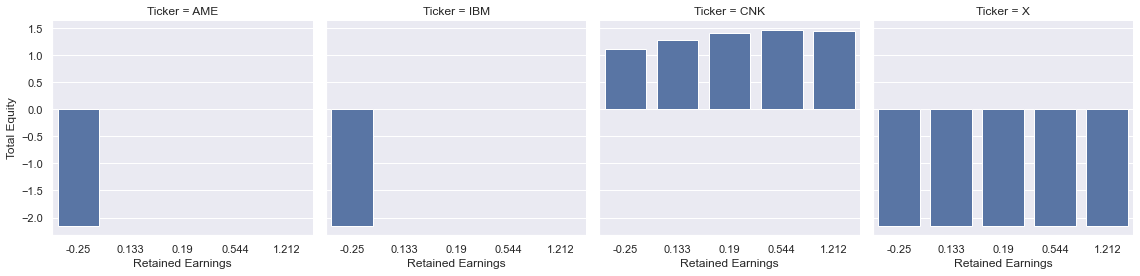

In [148]:
g = sns.FacetGrid(balance_sheet_tanglibles.reset_index(), col="Ticker", height=4, aspect=1)
g.map(sns.barplot,'Retained Earnings','Total Equity')

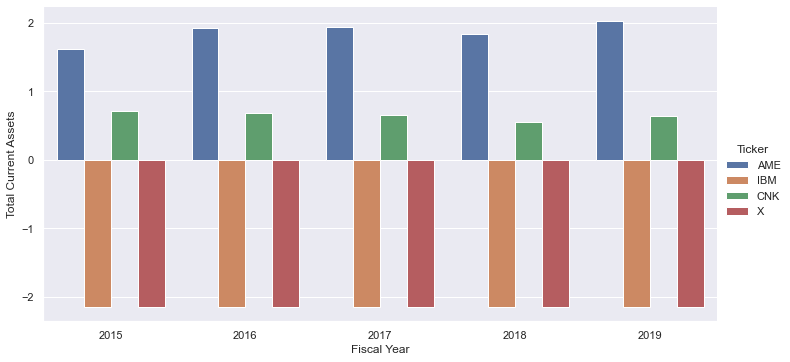

In [92]:
# creating a simple bar plot to show our choosen companies and get a look at "Total Current Assets"

sns.catplot(x='Fiscal Year', y= "Total Current Assets", hue="Ticker", kind="bar", data=isolated_companies_full_data.reset_index(),aspect=2)


In [93]:
# full dataframe for our choosen companies for the desired time lengt

isolated_companies_full_data.describe()


,Shares (Basic),Shares (Diluted),"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,...,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Treasury Stock,Retained Earnings,Total Equity,Total Liabilities & Equity
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.361773,0.363328,-0.004350,-0.078734,1.006890,-0.444410,-0.515734,-0.038718,-0.698311,-2.147484,...,-0.418552,-0.658386,-0.720007,-2.147484,-0.774720,-0.618999,-0.920667,-0.845576,-1.275918,-0.004371
std,0.341624,0.343302,1.310037,1.282899,0.775860,1.804095,1.731923,1.179697,1.703046,0.000000,...,1.034202,1.549228,1.998361,0.000000,0.976255,1.577963,0.888006,1.362890,1.550283,1.197268
min,0.115080,0.115399,-2.147484,-2.147484,0.015954,-2.147484,-2.147484,-2.147484,-2.147484,-2.147484,...,-2.147484,-2.147484,-2.147484,-2.147484,-2.048935,-2.147484,-2.147484,-2.147484,-2.147484,-1.929485
25%,0.138647,0.138722,-0.271390,-0.481156,0.374500,-2.147484,-2.147484,0.169681,-2.147484,-2.147484,...,-0.534621,-2.147484,-2.147484,-2.147484,-1.385696,-2.147484,-1.717719,-2.147484,-2.147484,-1.171826
50%,0.203110,0.203928,0.505430,0.343705,1.087872,-0.794227,-0.837127,0.247669,-2.147484,-2.147484,...,0.033829,-0.853845,-2.147484,-2.147484,-0.998058,-0.788295,-0.612215,-1.198742,-2.147484,0.124140
75%,0.401738,0.404393,0.725194,0.774570,1.634750,0.941070,0.791865,0.488250,0.801000,-2.147484,...,0.249305,0.762710,1.895095,-2.147484,0.094895,0.904947,-0.078944,0.476259,-1.332909,0.914367
max,0.978745,0.982700,1.553000,1.435000,2.092000,2.025771,1.833133,2.074000,1.814083,-2.147484,...,0.497449,1.425858,2.062644,-2.147484,1.582719,1.170161,-0.066577,1.212000,1.456117,1.860145


In [94]:
isolated_companies_full_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20 entries, ('AME', 2015) to ('X', 2019)
Data columns (total 22 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Shares (Basic)                                   20 non-null     float64
 1   Shares (Diluted)                                 20 non-null     float64
 2   Cash, Cash Equivalents & Short Term Investments  20 non-null     float64
 3   Accounts & Notes Receivable                      20 non-null     float64
 4   Inventories                                      20 non-null     float64
 5   Total Current Assets                             20 non-null     float64
 6   Property, Plant & Equipment, Net                 20 non-null     float64
 7   Long Term Investments & Receivables              20 non-null     float64
 8   Other Long Term Assets                           20 non-null     float64
 9   Total Noncurr

In [95]:
isolated_companies_full_data.T

Ticker                                                AME                      \
Fiscal Year                                          2015      2016      2017   
Shares (Basic)                                   0.239906  0.232593  0.230229   
Shares (Diluted)                                 0.241586  0.233730  0.231845   
Cash, Cash Equivalents & Short Term Investments  0.381005  0.717259  0.646300   
Accounts & Notes Receivable                      0.603295  0.592326  0.668176   
Inventories                                      0.514451  0.492104  0.540504   
Total Current Assets                             1.618827  1.928190  1.934655   
Property, Plant & Equipment, Net                 0.484548  0.473230  0.493296   
Long Term Investments & Receivables              0.177481  0.146283  0.239129   
Other Long Term Assets                          -2.147484 -2.147484 -2.147484   
Total Noncurrent Assets                         -2.147484 -2.147484 -2.147484   
Total Assets                                    -1.929485 -1.489261 -0.793871   
Payables & Accruals                              0.639097  0.645520  0.830540   
Short Term Debt                                  0.384924  0.278921  0.308123   
Total Current Liabilities                        1.024021  0.924441  1.138663   
Long Term Debt                                   1.553116  2.062644  1.866166   
Total Noncurrent Liabilities                    -2.147484 -2.147484 -2.147484   
Total Liabilities                               -0.889143 -0.450806 -0.526536   
Share Capital & Additional Paid-In Capital       0.570894  0.606758  0.663525   
Treasury Stock                                  -0.885430 -1.211539 -1.209135   
Retained Earnings                               -2.147484 -2.147484 -2.147484   
Total Equity                                    -2.147484 -2.147484 -2.147484   
Total Liabilities & Equity                      -1.929485 -1.489261 -0.793871   

Ticker                                                                    IBM  \
Fiscal Year                                          2018      2019      2015   
Shares (Basic)                                   0.230823  0.227759  0.978745   
Shares (Diluted)                                 0.232712  0.229395  0.982700   
Cash, Cash Equivalents & Short Term Investments  0.353975  0.393030 -2.147484   
Accounts & Notes Receivable                      0.732839  0.744760 -2.147484   
Inventories                                      0.624744  0.624567  1.551000   
Total Current Assets                             1.836144  2.025771 -2.147484   
Property, Plant & Equipment, Net                 0.554130  0.548908 -2.147484   
Long Term Investments & Receivables              0.256210  0.279790 -2.147484   
Other Long Term Assets                          -2.147484 -2.147484 -2.147484   
Total Noncurrent Assets                         -2.147484 -2.147484 -2.147484   
Total Assets                                     0.072353  1.254624 -1.174150   
Payables & Accruals                              0.762599  0.771591 -2.147484   
Short Term Debt                                  0.358876  0.497449 -2.147484   
Total Current Liabilities                        1.258704  1.425858 -2.147484   
Long Term Debt                                  -2.147484 -2.147484 -2.147484   
Total Noncurrent Liabilities                    -2.147484 -2.147484 -2.147484   
Total Liabilities                                0.125399  0.434100  1.582719   
Share Capital & Additional Paid-In Capital       0.709383  0.835483 -2.147484   
Treasury Stock                                  -1.570184 -1.574464 -2.147484   
Retained Earnings                               -2.147484 -2.147484 -2.147484   
Total Equity                                    -2.147484 -2.147484 -2.147484   
Total Liabilities & Equity                       0.072353  1.254624 -1.174150   

Ticker                                                                         \
Fiscal Year                  

## Feature Analysts



In this section I isolate values in my data I deemed important features & vizulalized results 

In [96]:
# Selecting columns from one Pandas DataFrame and storing in new variables determined by values present 



balance_sheet_cash_equal = isolated_companies_full_data[["Total Current Assets" ,"Cash, Cash Equivalents & Short Term Investments", 
                                  "Accounts & Notes Receivable", 
                                  'Treasury Stock', 
                                  'Retained Earnings']]
balance_sheet_cash_equal.head()


Total Current Assets  \
Ticker Fiscal Year                         
AME    2015                     1.618827   
       2016                     1.928190   
       2017                     1.934655   
       2018                     1.836144   
       2019                     2.025771   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
AME    2015                                                0.381005   
       2016                                                0.717259   
       2017                                                0.646300   
       2018                                                0.353975   
       2019                                                0.393030   

                    Accounts & Notes Receivable  Treasury Stock  \
Ticker Fiscal Year                                                
AME    2015                            0.603295       -0.885430   
       2016                            0.592326       -1.211539   
       2017                            0.668176       -1.209135   
       2018                            0.732839       -1.570184   
       2019                            0.744760       -1.574464   

                    Retained Earnings  
Ticker Fiscal Year                     
AME    2015                 -2.147484  
       2016                 -2.147484  
       2017                 -2.147484  
       2018                 -2.147484  
       2019                 -2.147484

In [97]:
# Displays balance_sheet_cash_equal data per company 

balance_sheet_cash_equal.describe()

,Total Current Assets,"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Treasury Stock,Retained Earnings
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.444410,-0.004350,-0.078734,-0.920667,-0.845576
std,1.804095,1.310037,1.282899,0.888006,1.362890
min,-2.147484,-2.147484,-2.147484,-2.147484,-2.147484
25%,-2.147484,-0.271390,-0.481156,-1.717719,-2.147484
50%,-0.794227,0.505430,0.343705,-0.612215,-1.198742
75%,0.941070,0.725194,0.774570,-0.078944,0.476259
max,2.025771,1.553000,1.435000,-0.066577,1.212000


In [98]:
balance_sheet_cash_equal.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20 entries, ('AME', 2015) to ('X', 2019)
Data columns (total 5 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Total Current Assets                             20 non-null     float64
 1   Cash, Cash Equivalents & Short Term Investments  20 non-null     float64
 2   Accounts & Notes Receivable                      20 non-null     float64
 3   Treasury Stock                                   20 non-null     float64
 4   Retained Earnings                                20 non-null     float64
dtypes: float64(5)
memory usage: 83.0+ KB


In [99]:
balance_sheet_cash_equal.T

Ticker                                                AME                      \
Fiscal Year                                          2015      2016      2017   
Total Current Assets                             1.618827  1.928190  1.934655   
Cash, Cash Equivalents & Short Term Investments  0.381005  0.717259  0.646300   
Accounts & Notes Receivable                      0.603295  0.592326  0.668176   
Treasury Stock                                  -0.885430 -1.211539 -1.209135   
Retained Earnings                               -2.147484 -2.147484 -2.147484   

Ticker                                                                    IBM  \
Fiscal Year                                          2018      2019      2015   
Total Current Assets                             1.836144  2.025771 -2.147484   
Cash, Cash Equivalents & Short Term Investments  0.353975  0.393030 -2.147484   
Accounts & Notes Receivable                      0.732839  0.744760 -2.147484   
Treasury Stock                                  -1.570184 -1.574464 -2.147484   
Retained Earnings                               -2.147484 -2.147484 -2.147484   

Ticker                                                                         \
Fiscal Year                                          2016      2017      2018   
Total Current Assets                            -2.147484 -2.147484 -2.147484   
Cash, Cash Equivalents & Short Term Investments -2.147484 -2.147484 -2.147484   
Accounts & Notes Receivable                     -2.147484 -2.147484 -2.147484   
Treasury Stock                                  -2.147484 -2.147484 -2.147484   
Retained Earnings                               -2.147484 -2.147484 -2.147484   

Ticker                                                          CNK            \
Fiscal Year                                          2019      2015      2016   
Total Current Assets                            -2.147484  0.715151  0.676317   
Cash, Cash Equivalents & Short Term Investments -2.147484  0.588539  0.561235   
Accounts & Notes Receivable                     -2.147484  0.074287  0.074993   
Treasury Stock                                  -2.147484 -0.066577 -0.073411   
Retained Earnings                               -2.147484  0.324632  0.453679   

Ticker                                                                         \
Fiscal Year                                          2017      2018      2019   
Total Current Assets                             0.657570  0.559030  0.634990   
Cash, Cash Equivalents & Short Term Investments  0.522547  0.426222  0.488313   
Accounts & Notes Receivable                      0.089250  0.095084  0.083722   
Treasury Stock                                  -0.076354 -0.079259 -0.081567   
Retained Earnings                                0.582222  0.686459  0.687332   

Ticker                                                  X                      \
Fiscal Year                                          2015      2016      2017   
Total Current Assets                            -2.147484 -2.147484 -2.147484   
Cash, Cash Equivalents & Short Term Investments  0.755000  1.515000  1.553000   
Accounts & Notes Receivable                      0.864000  0.976000  1.173000   
Treasury Stock                                  -0.339000 -0.182000 -0.076000   
Retained Earnings                                0.190000 -0.250000  0.133000   

Ticker                                                               
Fiscal Year                                          2018      2019  
Total Current Assets                            -2.147484 -2.147484  
Cash, Cash Equivalents & Short Term Investments  1.000000  0.749000  
Accounts & Notes Receivable                      1.435000  0.956000  
Treasury Stock                                  -0.078000 -0.173000  
Retained Earnings                                1.212000  0.544000

In [101]:
# Selecting columns from one Pandas DataFrame and storing in new variable 


balance_sheet_tanglibles = isolated_companies_full_data[
    ['Total Current Assets',
     "Cash, Cash Equivalents & Short Term Investments",
      "Property, Plant & Equipment, Net",
      "Retained Earnings", 
      "Total Equity"]]

balance_sheet_tanglibles.head()


Total Current Assets  \
Ticker Fiscal Year                         
AME    2015                     1.618827   
       2016                     1.928190   
       2017                     1.934655   
       2018                     1.836144   
       2019                     2.025771   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
AME    2015                                                0.381005   
       2016                                                0.717259   
       2017                                                0.646300   
       2018                                                0.353975   
       2019                                                0.393030   

                    Property, Plant & Equipment, Net  Retained Earnings  \
Ticker Fiscal Year                                                        
AME    2015                                 0.484548          -2.147484   
       2016                                 0.473230          -2.147484   
       2017                                 0.493296          -2.147484   
       2018                                 0.554130          -2.147484   
       2019                                 0.548908          -2.147484   

                    Total Equity  
Ticker Fiscal Year                
AME    2015            -2.147484  
       2016            -2.147484  
       2017            -2.147484  
       2018            -2.147484  
       2019            -2.147484

In [103]:
balance_sheet_tanglibles.describe()

,Total Current Assets,"Cash, Cash Equivalents & Short Term Investments","Property, Plant & Equipment, Net",Retained Earnings,Total Equity
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.444410,-0.004350,-0.515734,-0.845576,-1.275918
std,1.804095,1.310037,1.731923,1.362890,1.550283
min,-2.147484,-2.147484,-2.147484,-2.147484,-2.147484
25%,-2.147484,-0.271390,-2.147484,-2.147484,-2.147484
50%,-0.794227,0.505430,-0.837127,-1.198742,-2.147484
75%,0.941070,0.725194,0.791865,0.476259,-1.332909
max,2.025771,1.553000,1.833133,1.212000,1.456117


In [104]:
balance_sheet_tanglibles.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20 entries, ('AME', 2015) to ('X', 2019)
Data columns (total 5 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Total Current Assets                             20 non-null     float64
 1   Cash, Cash Equivalents & Short Term Investments  20 non-null     float64
 2   Property, Plant & Equipment, Net                 20 non-null     float64
 3   Retained Earnings                                20 non-null     float64
 4   Total Equity                                     20 non-null     float64
dtypes: float64(5)
memory usage: 83.0+ KB


C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


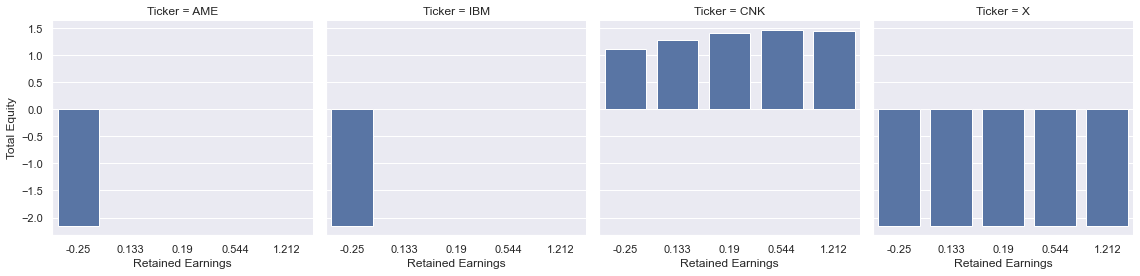

Ticker
AME    AxesSubplot(0.125,0.125;0.775x0.755)
CNK    AxesSubplot(0.125,0.125;0.775x0.755)
IBM    AxesSubplot(0.125,0.125;0.775x0.755)
X      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

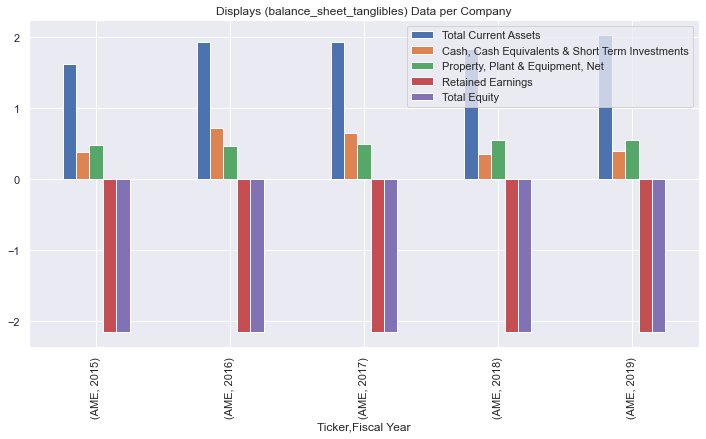

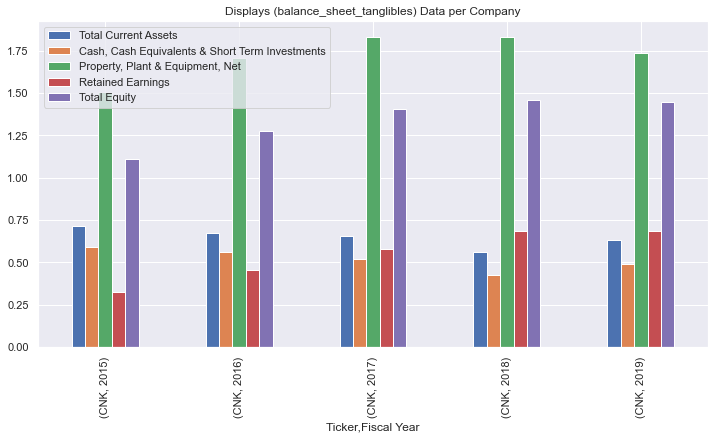

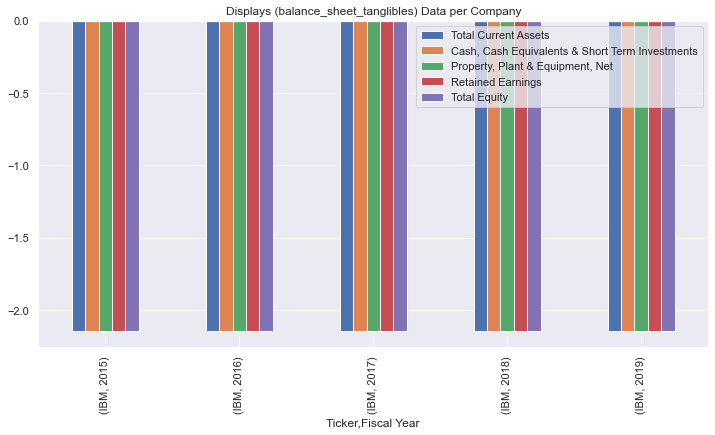

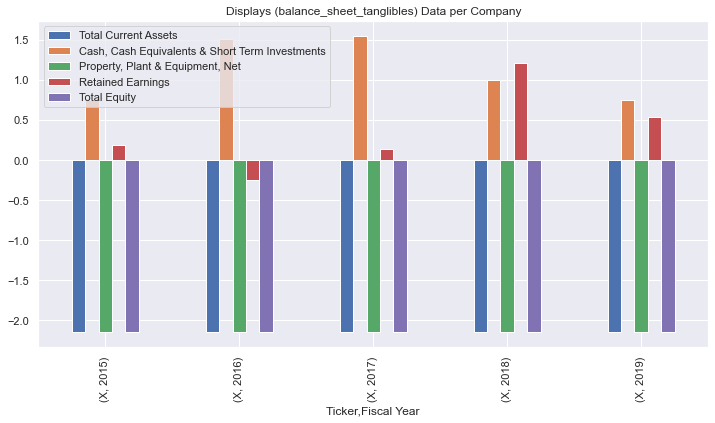

In [151]:
# Displays balance_sheet_tanglibles data per company 


balance_sheet_tanglibles.groupby(level=0).plot.bar(rot=90, figsize=(12,6), title="Displays (balance_sheet_tanglibles) Data per Company")

In [152]:
# Selecting columns from Pandas DataFrame and storing in new variables determined by values present 

balance_sheet_intanglibles = isolated_companies_full_data[
    ['Treasury Stock', 
     'Long Term Investments & Receivables', 
     'Shares (Basic)', 
     'Shares (Diluted)']]

balance_sheet_intanglibles


Treasury Stock  Long Term Investments & Receivables  \
Ticker Fiscal Year                                                        
AME    2015              -0.885430                             0.177481   
       2016              -1.211539                             0.146283   
       2017              -1.209135                             0.239129   
       2018              -1.570184                             0.256210   
       2019              -1.574464                             0.279790   
IBM    2015              -2.147484                            -2.147484   
       2016              -2.147484                            -2.147484   
       2017              -2.147484                            -2.147484   
       2018              -2.147484                            -2.147484   
       2019              -2.147484                             2.074000   
CNK    2015              -0.066577                             0.183755   
       2016              -0.073411                             0.189995   
       2017              -0.076354                             0.200550   
       2018              -0.079259                             0.275592   
       2019              -0.081567                             0.265792   
X      2015              -0.339000                             0.540000   
       2016              -0.182000                             0.528000   
       2017              -0.076000                             0.480000   
       2018              -0.078000                             0.513000   
       2019              -0.173000                             1.466000   

                    Shares (Basic)  Shares (Diluted)  
Ticker Fiscal Year                                    
AME    2015               0.239906          0.241586  
       2016               0.232593          0.233730  
       2017               0.230229          0.231845  
       2018               0.230823          0.232712  
       2019               0.227759          0.229395  
IBM    2015               0.978745          0.982700  
       2016               0.955423          0.958714  
       2017               0.932828          0.937386  
       2018               0.912048          0.916316  
       2019               0.887235          0.892813  
CNK    2015               0.115080          0.115399  
       2016               0.115508          0.115783  
       2017               0.115766          0.116059  
       2018               0.116054          0.116342  
       2019               0.116306          0.116606  
X      2015               0.146094          0.146094  
       2016               0.156673          0.156673  
       2017               0.176520          0.176520  
       2018               0.178461          0.178461  
       2019               0.171418          0.171418

Ticker
AME    AxesSubplot(0.125,0.125;0.775x0.755)
CNK    AxesSubplot(0.125,0.125;0.775x0.755)
IBM    AxesSubplot(0.125,0.125;0.775x0.755)
X      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

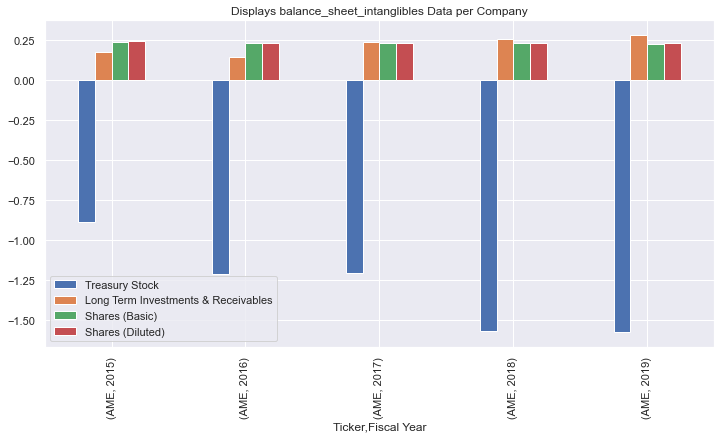

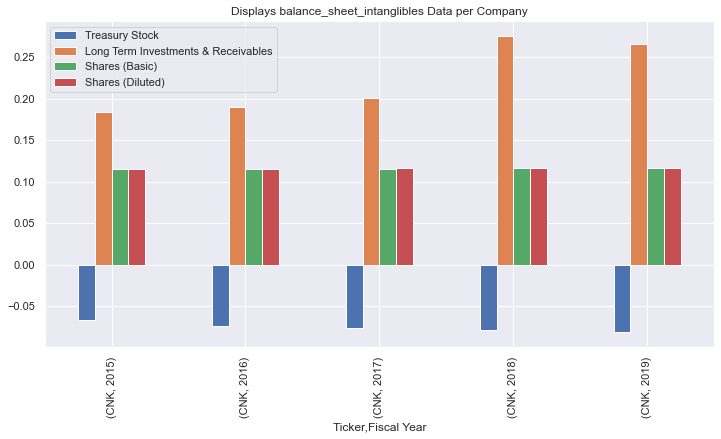

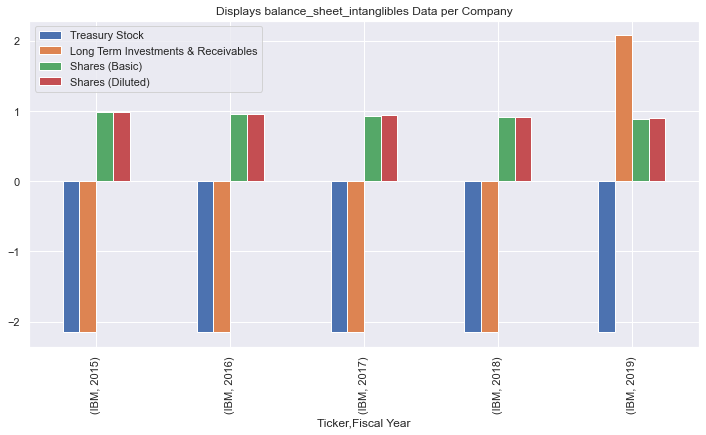

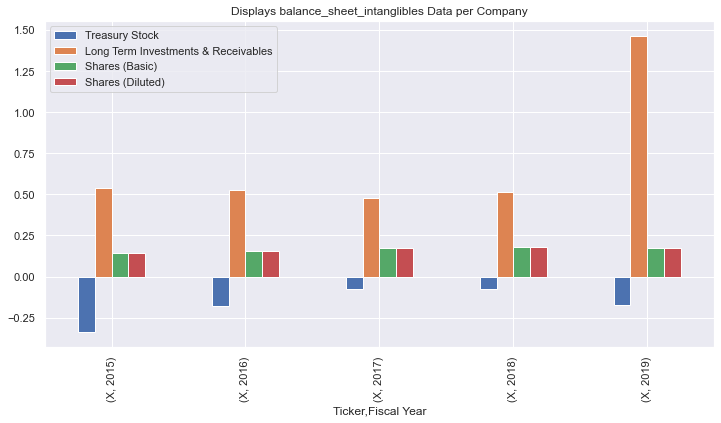

In [153]:
# Displays balance_sheet_intanglibles data per company 


balance_sheet_intanglibles.groupby(level=0).plot.bar(rot=90, figsize=(12,6), title="Displays balance_sheet_intanglibles Data per Company")



In [154]:
# Selecting columns from one Pandas DataFrame and storing in new variables determined by values present 

balance_data_neg = isolated_companies_full_data[
    ["Inventories",
     "Share Capital & Additional Paid-In Capital", 
     "Payables & Accruals", "Total Liabilities", 
     "Long Term Debt", 
     'Shares (Diluted)',
     'Total Liabilities & Equity', 
     'Total Current Liabilities']]

balance_data_neg


Inventories  Share Capital & Additional Paid-In Capital  \
Ticker Fiscal Year                                                            
AME    2015            0.514451                                    0.570894   
       2016            0.492104                                    0.606758   
       2017            0.540504                                    0.663525   
       2018            0.624744                                    0.709383   
       2019            0.624567                                    0.835483   
IBM    2015            1.551000                                   -2.147484   
       2016            1.553000                                   -2.147484   
       2017            1.583000                                   -2.147484   
       2018            1.682000                                   -2.147484   
       2019            1.619000                                   -2.147484   
CNK    2015            0.015954                                    1.113339   
       2016            0.016961                                    1.128563   
       2017            0.017507                                    1.141209   
       2018            0.019319                                    1.155545   
       2019            0.021686                                    1.170161   
X      2015            2.074000                                   -2.147484   
       2016            1.573000                                   -2.147484   
       2017            1.738000                                   -2.147484   
       2018            2.092000                                   -2.147484   
       2019            1.785000                                   -2.147484   

                    Payables & Accruals  Total Liabilities  Long Term Debt  \
Ticker Fiscal Year                                                           
AME    2015                    0.639097          -0.889143        1.553116   
       2016                    0.645520          -0.450806        2.062644   
       2017                    0.830540          -0.526536        1.866166   
       2018                    0.762599           0.125399       -2.147484   
       2019                    0.771591           0.434100       -2.147484   
IBM    2015                   -2.147484           1.582719       -2.147484   
       2016                   -2.147484           0.291752       -2.147484   
       2017                   -2.147484           0.256818       -2.147484   
       2018                   -2.147484          -0.921182       -2.147484   
       2019                   -2.147484          -1.942986       -2.147484   
CNK    2015                    0.403453          -1.279283        1.981882   
       2016                    0.406330          -1.261294        2.016722   
       2017                    0.424430          -1.229762        2.031532   
       2018                    0.439067          -1.269246        2.005094   
       2019                    0.455921           0.084728       -2.147484   
X      2015                    1.923000          -1.859935       -2.147484   
       2016                    2.087000          -1.704935       -2.147484   
       2017                   -2.147484          -2.048935       -2.147484   
       2018                   -2.147484          -1.810935       -2.147484   
       2019                   -2.147484          -1.074935       -2.147484   

                    Shares (Diluted)  Total Liabilities & Equity  \
Ticker Fiscal Year                                                 
AME    2015                 0.241586                   -1.929485   
       2016                 0.233730                   -1.489261   
       2017                 0.231845                   -0.793871   
       2018                 0.232712                    0.072353   
       2019                 0.229395                    1.254624   
IBM    2015                 0.982700                   -1.174150   
       2016         

Ticker
AME    AxesSubplot(0.125,0.125;0.775x0.755)
CNK    AxesSubplot(0.125,0.125;0.775x0.755)
IBM    AxesSubplot(0.125,0.125;0.775x0.755)
X      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

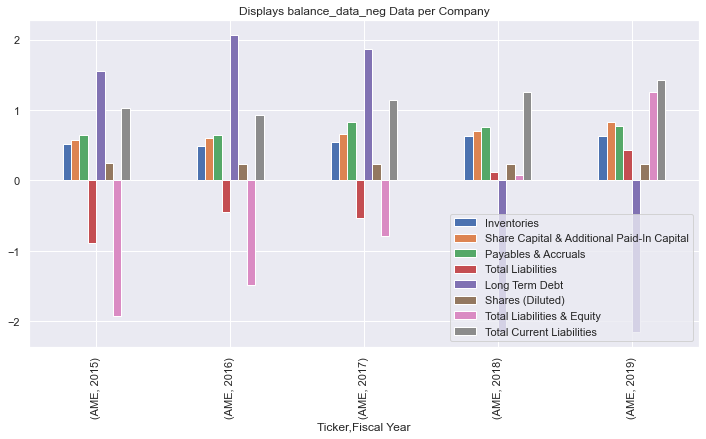

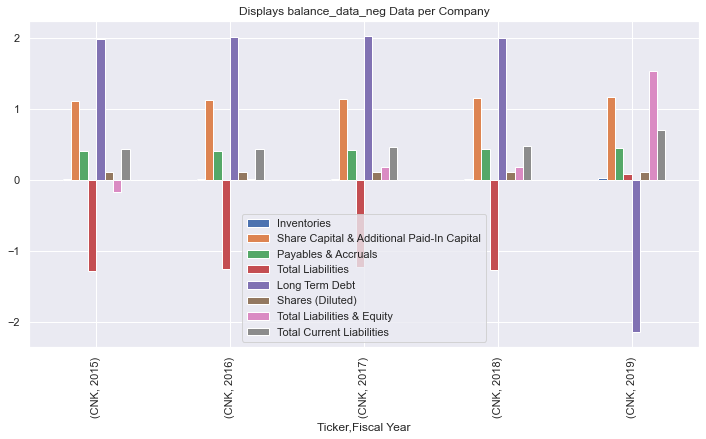

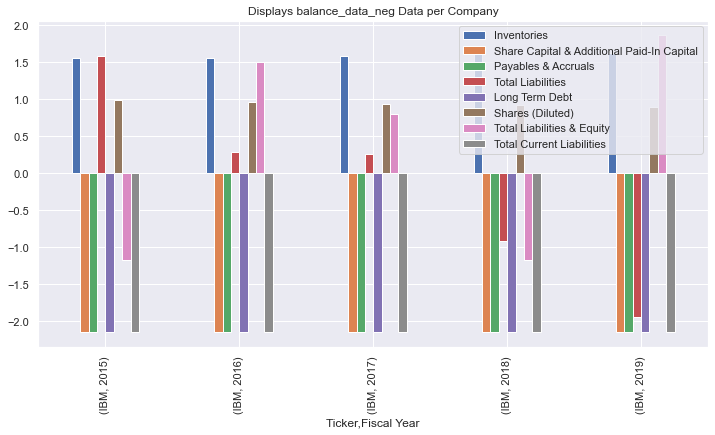

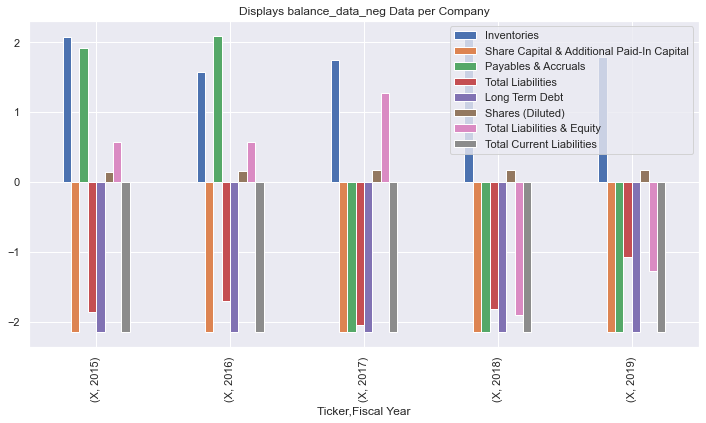

In [155]:
# Displays balance_data_neg data per company 


balance_data_neg.groupby(level=0).plot.bar(rot=90, figsize=(12,6), title="Displays balance_data_neg Data per Company")


In [156]:
# The first use of the 'merge_df' funtion

balance_cash_vs_neg_cash = merge_df(balance_sheet_cash_equal, balance_data_neg)
balance_cash_vs_neg_cash


Total Current Assets  \
Ticker Fiscal Year                         
AME    2015                     1.618827   
       2016                     1.928190   
       2017                     1.934655   
       2018                     1.836144   
       2019                     2.025771   
IBM    2015                    -2.147484   
       2016                    -2.147484   
       2017                    -2.147484   
       2018                    -2.147484   
       2019                    -2.147484   
CNK    2015                     0.715151   
       2016                     0.676317   
       2017                     0.657570   
       2018                     0.559030   
       2019                     0.634990   
X      2015                    -2.147484   
       2016                    -2.147484   
       2017                    -2.147484   
       2018                    -2.147484   
       2019                    -2.147484   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
AME    2015                                                0.381005   
       2016                                                0.717259   
       2017                                                0.646300   
       2018                                                0.353975   
       2019                                                0.393030   
IBM    2015                                               -2.147484   
       2016                                               -2.147484   
       2017                                               -2.147484   
       2018                                               -2.147484   
       2019                                               -2.147484   
CNK    2015                                                0.588539   
       2016                                                0.561235   
       2017                                                0.522547   
       2018                                                0.426222   
       2019                                                0.488313   
X      2015                                                0.755000   
       2016                                                1.515000   
       2017                                                1.553000   
       2018                                                1.000000   
       2019                                                0.749000   

                    Accounts & Notes Receivable  Treasury Stock  \
Ticker Fiscal Year                                                
AME    2015                            0.603295       -0.885430   
       2016                            0.592326       -1.211539   
       2017                            0.668176       -1.209135   
       2018                            0.732839       -1.570184   
       2019                            0.744760       -1.574464   
IBM    2015                           -2.147484       -2.147484   
       2016                           -2.147484       -2.147484   
       2017                           -2.147484       -2.147484   
       2018                           -2.147484       -2.147484   
       2019                           -2.147484       -2.147484   
CNK    2015                            0.074287       -0.066577   
       2016                            0.074993       -0.073411   
       2017                            0.089250       -0.076354   
       2018                            0.095084       -0.079259   
       2019                            0.083722       -0.081567   
X      2015                            0.864000       -0.339000   
       2016                            0.976000       -0.182000   
       2017                            1.173000       -0.076000   
       2018                            1.435000       -0.078000   
       2019                            0.956000       -0.173000   

             

In [157]:
# using loc funtion to create dog dataframe


balance_cash_vs_neg_cash_dog = balance_cash_vs_neg_cash.loc[['CNK','X']]
balance_cash_vs_neg_cash_dog



Total Current Assets  \
Ticker Fiscal Year                         
CNK    2015                     0.715151   
       2016                     0.676317   
       2017                     0.657570   
       2018                     0.559030   
       2019                     0.634990   
X      2015                    -2.147484   
       2016                    -2.147484   
       2017                    -2.147484   
       2018                    -2.147484   
       2019                    -2.147484   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
CNK    2015                                                0.588539   
       2016                                                0.561235   
       2017                                                0.522547   
       2018                                                0.426222   
       2019                                                0.488313   
X      2015                                                0.755000   
       2016                                                1.515000   
       2017                                                1.553000   
       2018                                                1.000000   
       2019                                                0.749000   

                    Accounts & Notes Receivable  Treasury Stock  \
Ticker Fiscal Year                                                
CNK    2015                            0.074287       -0.066577   
       2016                            0.074993       -0.073411   
       2017                            0.089250       -0.076354   
       2018                            0.095084       -0.079259   
       2019                            0.083722       -0.081567   
X      2015                            0.864000       -0.339000   
       2016                            0.976000       -0.182000   
       2017                            1.173000       -0.076000   
       2018                            1.435000       -0.078000   
       2019                            0.956000       -0.173000   

                    Retained Earnings  Inventories  \
Ticker Fiscal Year                                   
CNK    2015                  0.324632     0.015954   
       2016                  0.453679     0.016961   
       2017                  0.582222     0.017507   
       2018                  0.686459     0.019319   
       2019                  0.687332     0.021686   
X      2015                  0.190000     2.074000   
       2016                 -0.250000     1.573000   
       2017                  0.133000     1.738000   
       2018                  1.212000     2.092000   
       2019                  0.544000     1.785000   

                    Share Capital & Additional Paid-In Capital  \
Ticker Fiscal Year                                               
CNK    2015                                           1.113339   
       2016                                           1.128563   
       2017                                           1.141209   
       2018                                           1.155545   
       2019                                           1.170161   
X      2015                                          -2.147484   
       2016                                          -2.147484   
       2017                                          -2.147484   
       2018                                          -2.147484   
       2019                                          -2.147484   

                    Payables & Accruals  Total Liabilities  Long Term Debt  \
Ticker Fiscal Year                                                           
CNK    2015                    0.403453          -1.279283        1.981882   
       2016                    0.406330          -1.261294        2.016722   
       2017                    0.424430          -1.229762        2.031532   
 

Ticker
CNK    AxesSubplot(0.125,0.125;0.775x0.755)
X      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

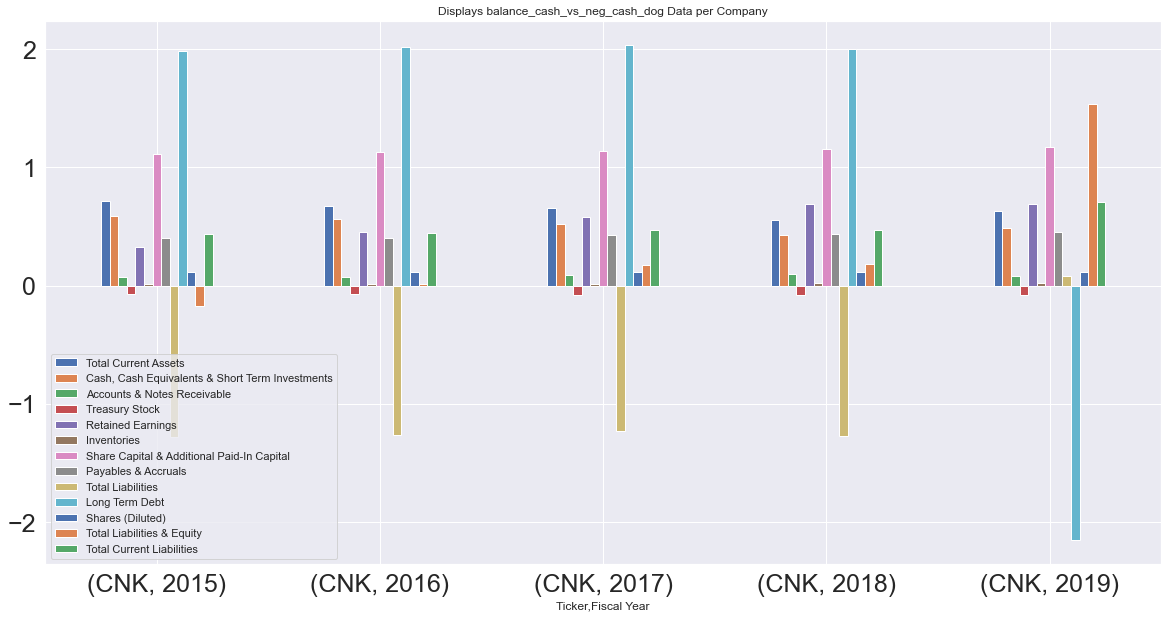

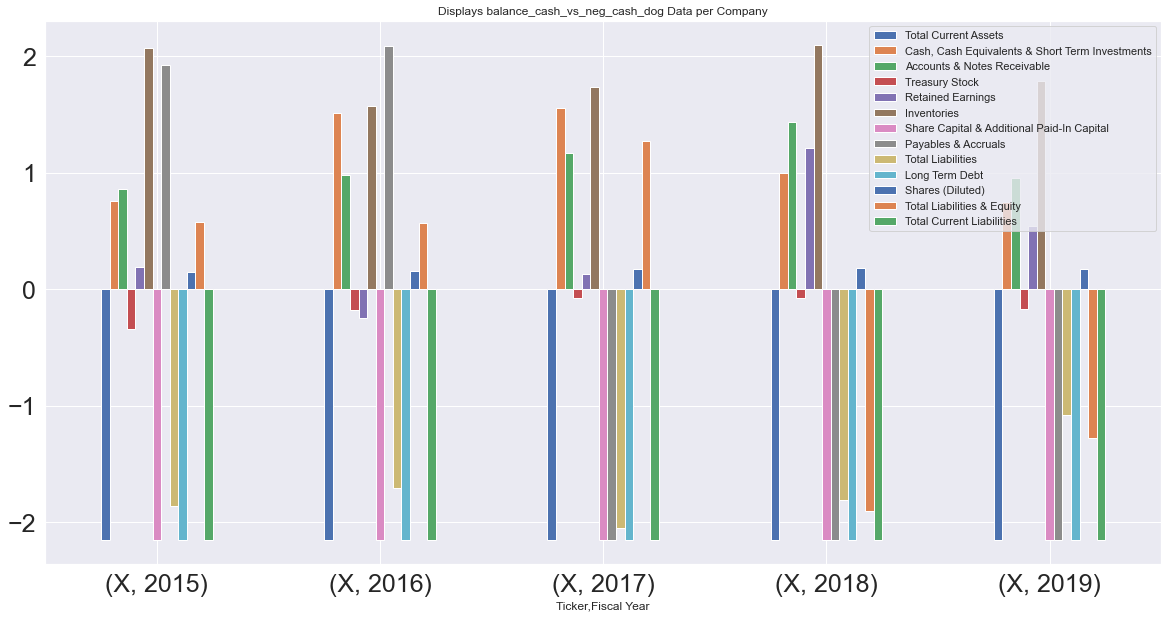

In [158]:
balance_cash_vs_neg_cash_dog.groupby(level=0).plot.bar(title="Displays balance_cash_vs_neg_cash_dog Data per Company",figsize=(20,10),rot =360, grid =True, fontsize = 25)

In [159]:
# using loc funtion to create tech dataframe

balance_cash_vs_neg_cash_tech = balance_cash_vs_neg_cash.loc[['AME','IBM']]
balance_cash_vs_neg_cash_tech


Total Current Assets  \
Ticker Fiscal Year                         
AME    2015                     1.618827   
       2016                     1.928190   
       2017                     1.934655   
       2018                     1.836144   
       2019                     2.025771   
IBM    2015                    -2.147484   
       2016                    -2.147484   
       2017                    -2.147484   
       2018                    -2.147484   
       2019                    -2.147484   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
AME    2015                                                0.381005   
       2016                                                0.717259   
       2017                                                0.646300   
       2018                                                0.353975   
       2019                                                0.393030   
IBM    2015                                               -2.147484   
       2016                                               -2.147484   
       2017                                               -2.147484   
       2018                                               -2.147484   
       2019                                               -2.147484   

                    Accounts & Notes Receivable  Treasury Stock  \
Ticker Fiscal Year                                                
AME    2015                            0.603295       -0.885430   
       2016                            0.592326       -1.211539   
       2017                            0.668176       -1.209135   
       2018                            0.732839       -1.570184   
       2019                            0.744760       -1.574464   
IBM    2015                           -2.147484       -2.147484   
       2016                           -2.147484       -2.147484   
       2017                           -2.147484       -2.147484   
       2018                           -2.147484       -2.147484   
       2019                           -2.147484       -2.147484   

                    Retained Earnings  Inventories  \
Ticker Fiscal Year                                   
AME    2015                 -2.147484     0.514451   
       2016                 -2.147484     0.492104   
       2017                 -2.147484     0.540504   
       2018                 -2.147484     0.624744   
       2019                 -2.147484     0.624567   
IBM    2015                 -2.147484     1.551000   
       2016                 -2.147484     1.553000   
       2017                 -2.147484     1.583000   
       2018                 -2.147484     1.682000   
       2019                 -2.147484     1.619000   

                    Share Capital & Additional Paid-In Capital  \
Ticker Fiscal Year                                               
AME    2015                                           0.570894   
       2016                                           0.606758   
       2017                                           0.663525   
       2018                                           0.709383   
       2019                                           0.835483   
IBM    2015                                          -2.147484   
       2016                                          -2.147484   
       2017                                          -2.147484   
       2018                                          -2.147484   
       2019                                          -2.147484   

                    Payables & Accruals  Total Liabilities  Long Term Debt  \
Ticker Fiscal Year                                                           
AME    2015                    0.639097          -0.889143        1.553116   
       2016                    0.645520          -0.450806        2.062644   
       2017                    0.830540          -0.526536        1.866166   
 

Ticker
AME    AxesSubplot(0.125,0.125;0.775x0.755)
IBM    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

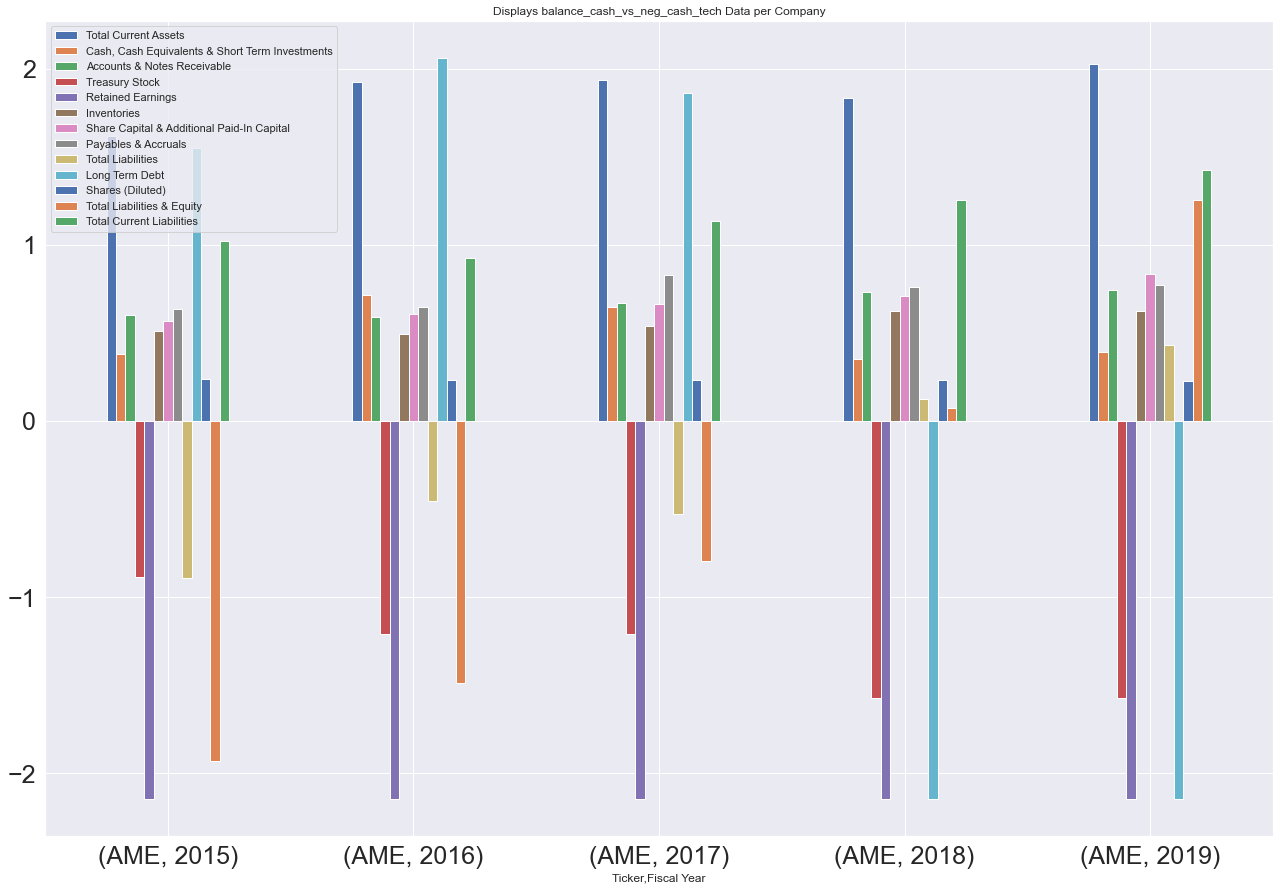

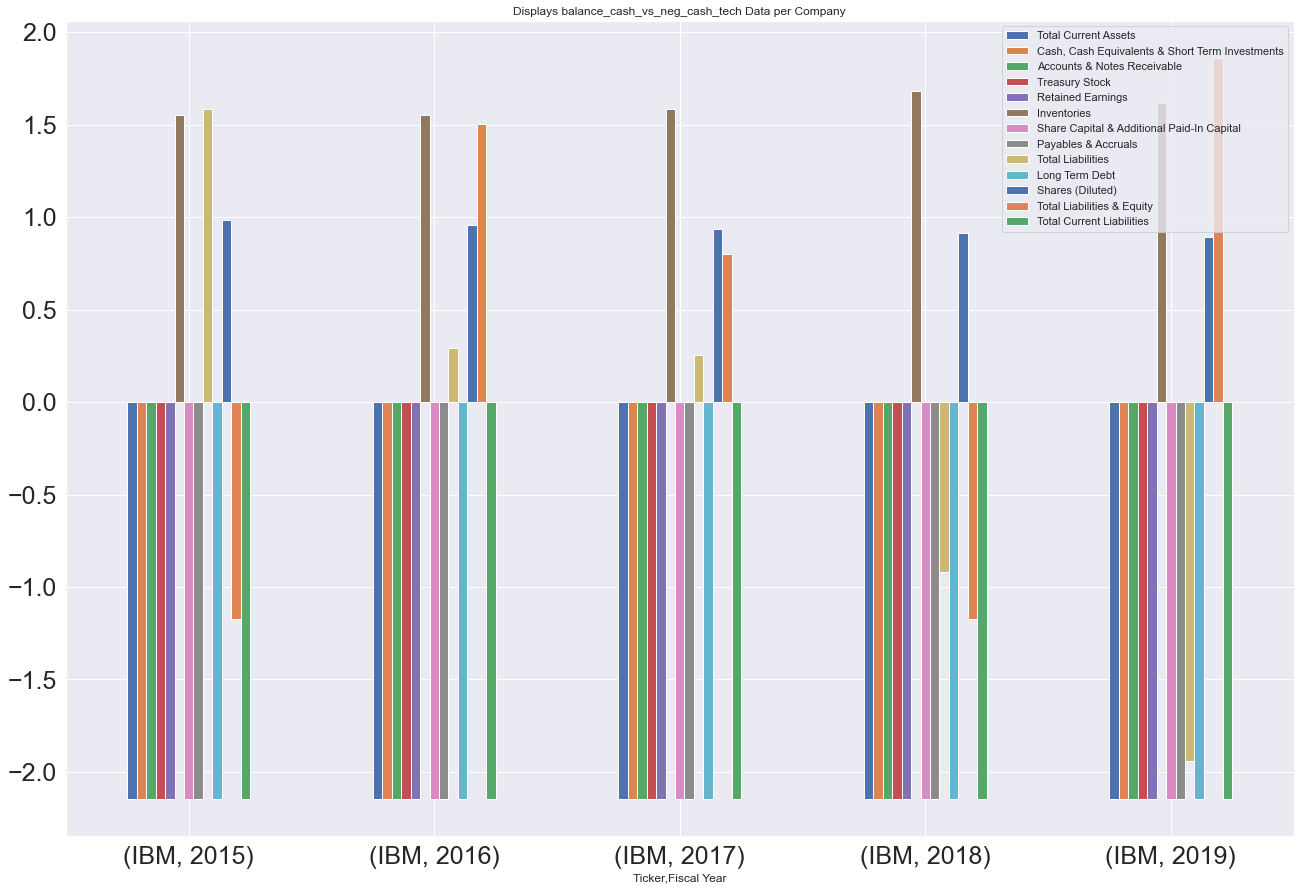

In [160]:
balance_cash_vs_neg_cash_tech.groupby(level=0).plot.bar(title="Displays balance_cash_vs_neg_cash_tech Data per Company",figsize=(22,15),rot =360, grid =True, fontsize = 25)

In [161]:
# using merge funtion to create tan vs intan dataframe

balance_intan_vs_tan = merge_df(balance_sheet_tanglibles,balance_sheet_intanglibles)
balance_intan_vs_tan


Total Current Assets  \
Ticker Fiscal Year                         
AME    2015                     1.618827   
       2016                     1.928190   
       2017                     1.934655   
       2018                     1.836144   
       2019                     2.025771   
IBM    2015                    -2.147484   
       2016                    -2.147484   
       2017                    -2.147484   
       2018                    -2.147484   
       2019                    -2.147484   
CNK    2015                     0.715151   
       2016                     0.676317   
       2017                     0.657570   
       2018                     0.559030   
       2019                     0.634990   
X      2015                    -2.147484   
       2016                    -2.147484   
       2017                    -2.147484   
       2018                    -2.147484   
       2019                    -2.147484   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
AME    2015                                                0.381005   
       2016                                                0.717259   
       2017                                                0.646300   
       2018                                                0.353975   
       2019                                                0.393030   
IBM    2015                                               -2.147484   
       2016                                               -2.147484   
       2017                                               -2.147484   
       2018                                               -2.147484   
       2019                                               -2.147484   
CNK    2015                                                0.588539   
       2016                                                0.561235   
       2017                                                0.522547   
       2018                                                0.426222   
       2019                                                0.488313   
X      2015                                                0.755000   
       2016                                                1.515000   
       2017                                                1.553000   
       2018                                                1.000000   
       2019                                                0.749000   

                    Property, Plant & Equipment, Net  Retained Earnings  \
Ticker Fiscal Year                                                        
AME    2015                                 0.484548          -2.147484   
       2016                                 0.473230          -2.147484   
       2017                                 0.493296          -2.147484   
       2018                                 0.554130          -2.147484   
       2019                                 0.548908          -2.147484   
IBM    2015                                -2.147484          -2.147484   
       2016                                -2.147484          -2.147484   
       2017                                -2.147484          -2.147484   
       2018                                -2.147484          -2.147484   
       2019                                -2.147484          -2.147484   
CNK    2015                                 1.505069           0.324632   
       2016                                 1.704536           0.453679   
       2017                                 1.828054           0.582222   
       2018                                 1.833133           0.686459   
       2019                                 1.735247           0.687332   
X      2015                                -2.147484           0.190000   
       2016                                -2.147484          -0.250000   
       2017                                -2.147484           

In [162]:
# using loc funtion to create tech dataframe

balance_intan_vs_tan_tech =  balance_intan_vs_tan.loc[['AME','IBM']]
balance_intan_vs_tan_tech

Total Current Assets  \
Ticker Fiscal Year                         
AME    2015                     1.618827   
       2016                     1.928190   
       2017                     1.934655   
       2018                     1.836144   
       2019                     2.025771   
IBM    2015                    -2.147484   
       2016                    -2.147484   
       2017                    -2.147484   
       2018                    -2.147484   
       2019                    -2.147484   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
AME    2015                                                0.381005   
       2016                                                0.717259   
       2017                                                0.646300   
       2018                                                0.353975   
       2019                                                0.393030   
IBM    2015                                               -2.147484   
       2016                                               -2.147484   
       2017                                               -2.147484   
       2018                                               -2.147484   
       2019                                               -2.147484   

                    Property, Plant & Equipment, Net  Retained Earnings  \
Ticker Fiscal Year                                                        
AME    2015                                 0.484548          -2.147484   
       2016                                 0.473230          -2.147484   
       2017                                 0.493296          -2.147484   
       2018                                 0.554130          -2.147484   
       2019                                 0.548908          -2.147484   
IBM    2015                                -2.147484          -2.147484   
       2016                                -2.147484          -2.147484   
       2017                                -2.147484          -2.147484   
       2018                                -2.147484          -2.147484   
       2019                                -2.147484          -2.147484   

                    Total Equity  Treasury Stock  \
Ticker Fiscal Year                                 
AME    2015            -2.147484       -0.885430   
       2016            -2.147484       -1.211539   
       2017            -2.147484       -1.209135   
       2018            -2.147484       -1.570184   
       2019            -2.147484       -1.574464   
IBM    2015            -2.147484       -2.147484   
       2016            -2.147484       -2.147484   
       2017            -2.147484       -2.147484   
       2018            -2.147484       -2.147484   
       2019            -2.147484       -2.147484   

                    Long Term Investments & Receivables  Shares (Basic)  \
Ticker Fiscal Year                                                        
AME    2015                                    0.177481        0.239906   
       2016                                    0.146283        0.232593   
       2017                                    0.239129        0.230229   
       2018                                    0.256210        0.230823   
       2019                                    0.279790        0.227759   
IBM    2015                                   -2.147484        0.978745   
       2016                                   -2.147484        0.955423   
       2017                                   -2.147484        0.932828   
       2018                                   -2.147484        0.912048   
       2019                                    2.074000        0.887235   

                    Shares (Diluted)  
Ticker Fiscal Year                    
AME    2015                 0.241586  
       2016                 0.233730  
       2017                 0.231845  
       2018     

Ticker
AME    AxesSubplot(0.125,0.125;0.775x0.755)
IBM    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

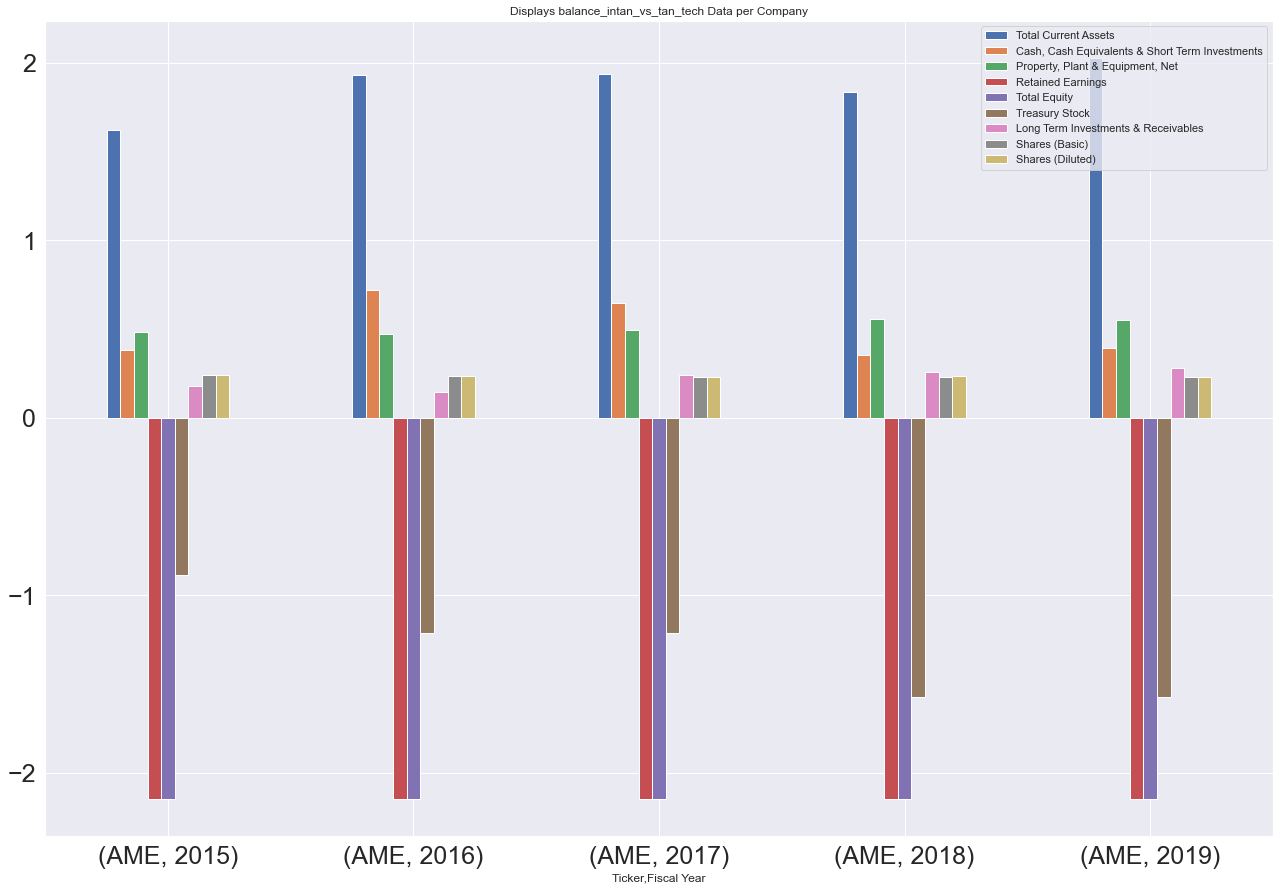

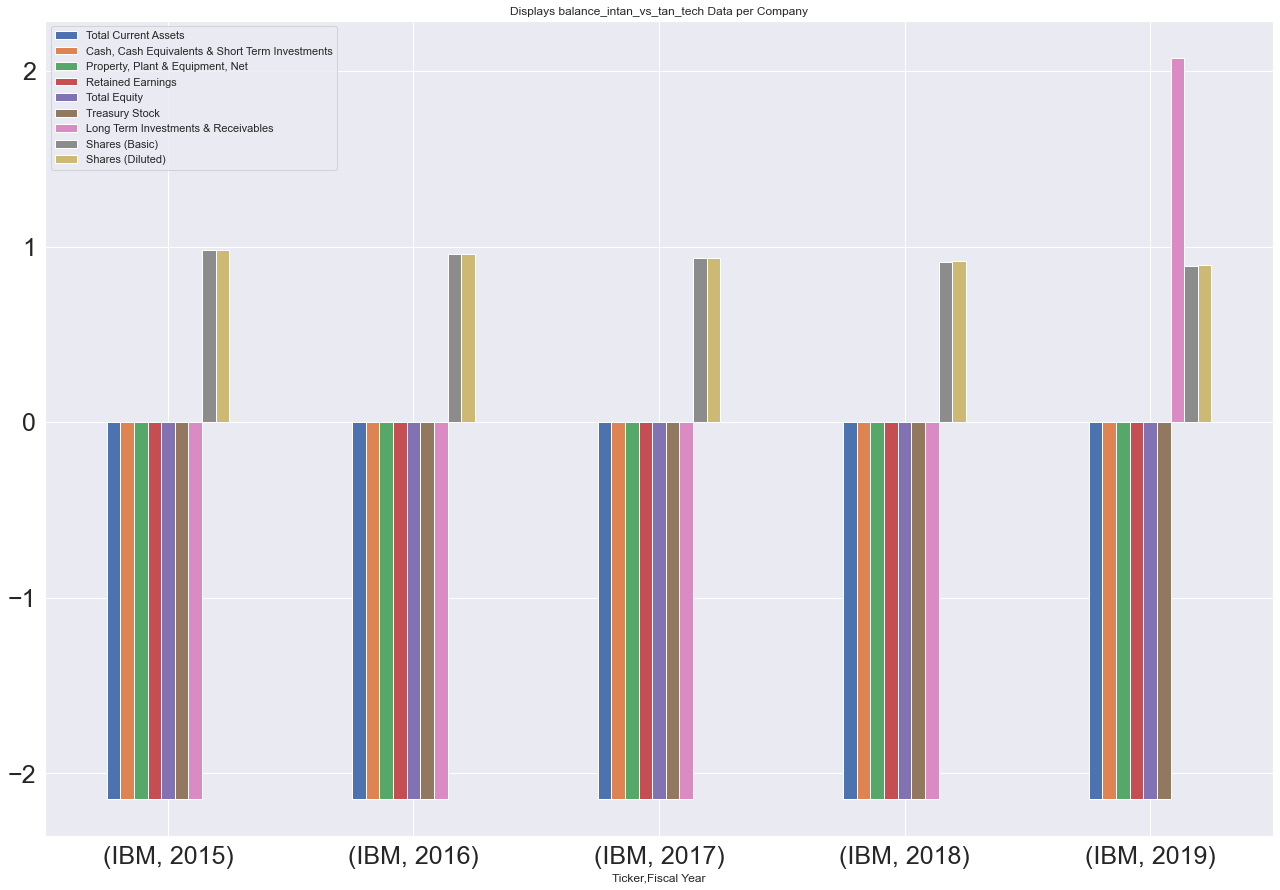

In [163]:
balance_intan_vs_tan_tech.groupby(level=0).plot.bar(title="Displays balance_intan_vs_tan_tech Data per Company",figsize=(22,15),rot =360, grid =True, fontsize = 25)


In [164]:
# using loc funtion to create dog dataframe


balance_intan_vs_tan_dog = balance_intan_vs_tan.loc[['CNK','X']]
balance_intan_vs_tan_dog


Total Current Assets  \
Ticker Fiscal Year                         
CNK    2015                     0.715151   
       2016                     0.676317   
       2017                     0.657570   
       2018                     0.559030   
       2019                     0.634990   
X      2015                    -2.147484   
       2016                    -2.147484   
       2017                    -2.147484   
       2018                    -2.147484   
       2019                    -2.147484   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
CNK    2015                                                0.588539   
       2016                                                0.561235   
       2017                                                0.522547   
       2018                                                0.426222   
       2019                                                0.488313   
X      2015                                                0.755000   
       2016                                                1.515000   
       2017                                                1.553000   
       2018                                                1.000000   
       2019                                                0.749000   

                    Property, Plant & Equipment, Net  Retained Earnings  \
Ticker Fiscal Year                                                        
CNK    2015                                 1.505069           0.324632   
       2016                                 1.704536           0.453679   
       2017                                 1.828054           0.582222   
       2018                                 1.833133           0.686459   
       2019                                 1.735247           0.687332   
X      2015                                -2.147484           0.190000   
       2016                                -2.147484          -0.250000   
       2017                                -2.147484           0.133000   
       2018                                -2.147484           1.212000   
       2019                                -2.147484           0.544000   

                    Total Equity  Treasury Stock  \
Ticker Fiscal Year                                 
CNK    2015             1.110813       -0.066577   
       2016             1.272960       -0.073411   
       2017             1.405688       -0.076354   
       2018             1.456117       -0.079259   
       2019             1.448322       -0.081567   
X      2015            -2.147484       -0.339000   
       2016            -2.147484       -0.182000   
       2017            -2.147484       -0.076000   
       2018            -2.147484       -0.078000   
       2019            -2.147484       -0.173000   

                    Long Term Investments & Receivables  Shares (Basic)  \
Ticker Fiscal Year                                                        
CNK    2015                                    0.183755        0.115080   
       2016                                    0.189995        0.115508   
       2017                                    0.200550        0.115766   
       2018                                    0.275592        0.116054   
       2019                                    0.265792        0.116306   
X      2015                                    0.540000        0.146094   
       2016                                    0.528000        0.156673   
       2017                                    0.480000        0.176520   
       2018                                    0.513000        0.178461   
       2019                                    1.466000        0.171418   

                    Shares (Diluted)  
Ticker Fiscal Year                    
CNK    2015                 0.115399  
       2016                 0.115783  
       2017                 0.116059  
       2018     

Ticker
CNK    AxesSubplot(0.125,0.125;0.775x0.755)
X      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

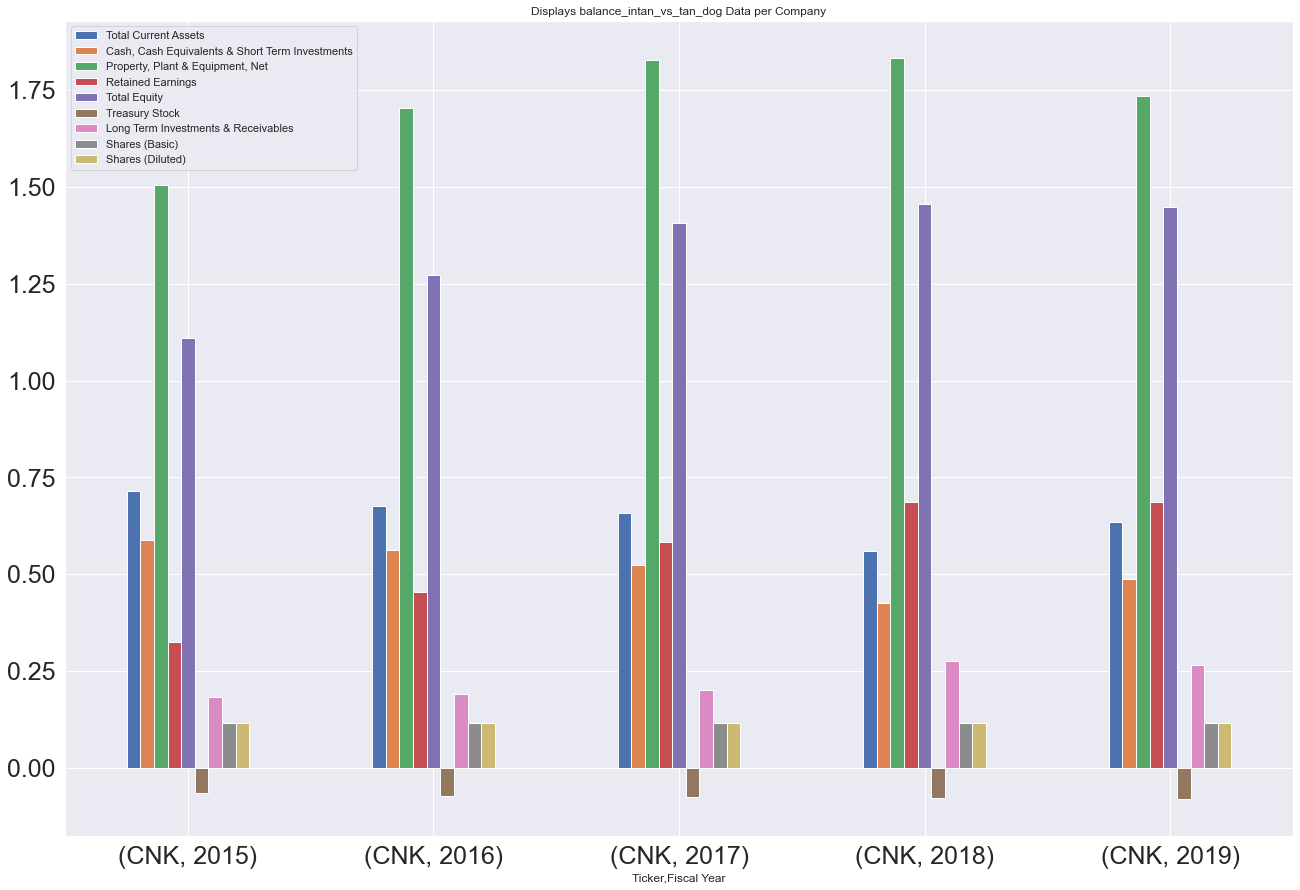

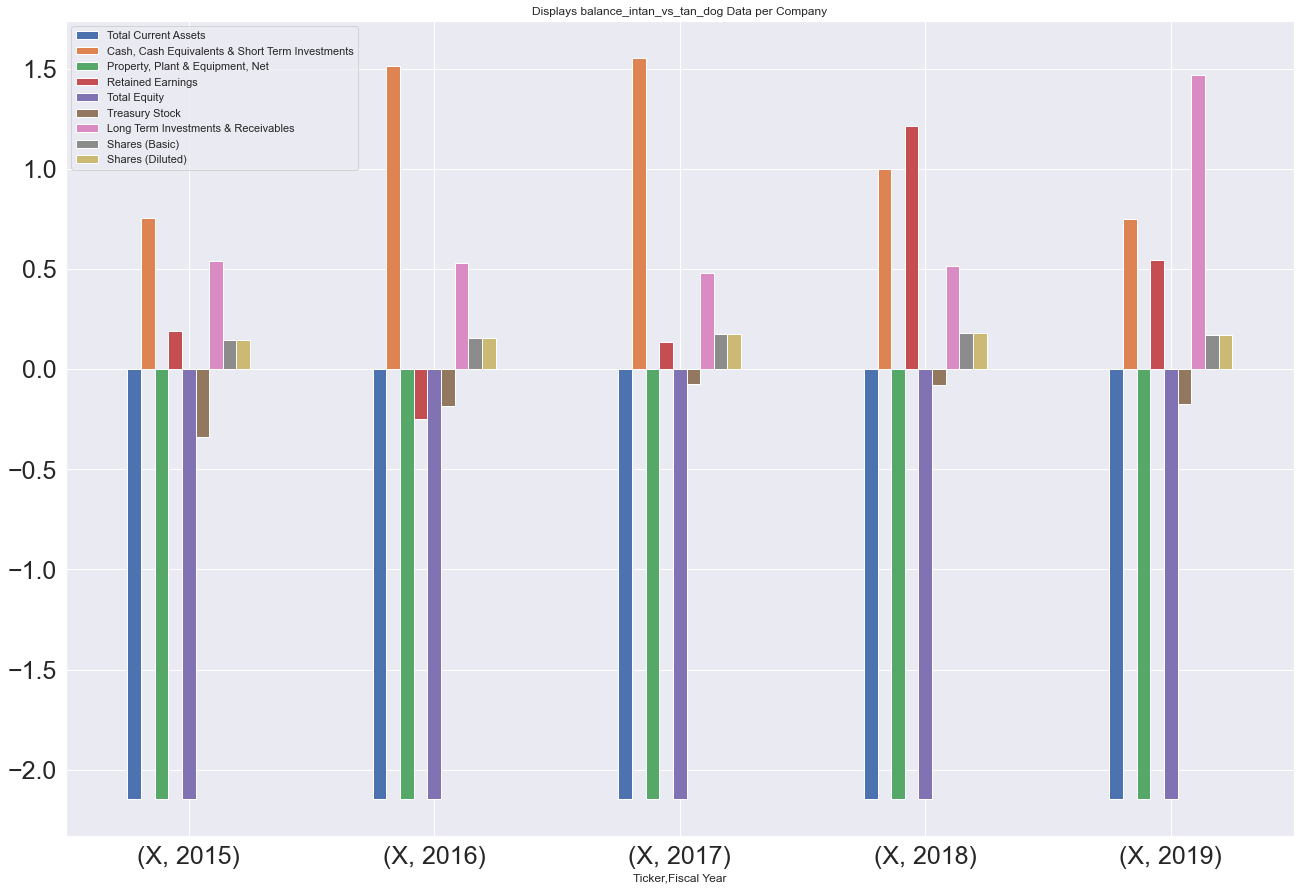

In [165]:

balance_intan_vs_tan_dog.groupby(level=0).plot.bar(title="Displays balance_intan_vs_tan_dog Data per Company",figsize=(22,15),rot =360, grid =True, fontsize = 25)


In [166]:
# using merge funtion to create bal_int_tan_vs_eqcash dataframe


bal_int_tan_vs_eqcash = merge_df(balance_sheet_intanglibles, balance_sheet_cash_equal).drop(columns=['Treasury Stock_y'])
bal_int_tan_vs_eqcash



Treasury Stock_x  Long Term Investments & Receivables  \
Ticker Fiscal Year                                                          
AME    2015                -0.885430                             0.177481   
       2016                -1.211539                             0.146283   
       2017                -1.209135                             0.239129   
       2018                -1.570184                             0.256210   
       2019                -1.574464                             0.279790   
IBM    2015                -2.147484                            -2.147484   
       2016                -2.147484                            -2.147484   
       2017                -2.147484                            -2.147484   
       2018                -2.147484                            -2.147484   
       2019                -2.147484                             2.074000   
CNK    2015                -0.066577                             0.183755   
       2016                -0.073411                             0.189995   
       2017                -0.076354                             0.200550   
       2018                -0.079259                             0.275592   
       2019                -0.081567                             0.265792   
X      2015                -0.339000                             0.540000   
       2016                -0.182000                             0.528000   
       2017                -0.076000                             0.480000   
       2018                -0.078000                             0.513000   
       2019                -0.173000                             1.466000   

                    Shares (Basic)  Shares (Diluted)  Total Current Assets  \
Ticker Fiscal Year                                                           
AME    2015               0.239906          0.241586              1.618827   
       2016               0.232593          0.233730              1.928190   
       2017               0.230229          0.231845              1.934655   
       2018               0.230823          0.232712              1.836144   
       2019               0.227759          0.229395              2.025771   
IBM    2015               0.978745          0.982700             -2.147484   
       2016               0.955423          0.958714             -2.147484   
       2017               0.932828          0.937386             -2.147484   
       2018               0.912048          0.916316             -2.147484   
       2019               0.887235          0.892813             -2.147484   
CNK    2015               0.115080          0.115399              0.715151   
       2016               0.115508          0.115783              0.676317   
       2017               0.115766          0.116059              0.657570   
       2018               0.116054          0.116342              0.559030   
       2019               0.116306          0.116606              0.634990   
X      2015               0.146094          0.146094             -2.147484   
       2016               0.156673          0.156673             -2.147484   
       2017               0.176520          0.176520             -2.147484   
       2018               0.178461          0.178461             -2.147484   
       2019               0.171418          0.171418             -2.147484   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
AME    2015                                                0.381005   
       2016                                                0.717259   
       2017                                                0.646300   
       2018                                                0.353975   
       2019                                                0.393030   
IBM    2015                                               -2.147484   
       2016                             

In [167]:
# using loc funtion to create new dataframe


bal_int_tan_vs_eqcash_new = bal_int_tan_vs_eqcash.loc[['CNK','X']]
bal_int_tan_vs_eqcash_new


Treasury Stock_x  Long Term Investments & Receivables  \
Ticker Fiscal Year                                                          
CNK    2015                -0.066577                             0.183755   
       2016                -0.073411                             0.189995   
       2017                -0.076354                             0.200550   
       2018                -0.079259                             0.275592   
       2019                -0.081567                             0.265792   
X      2015                -0.339000                             0.540000   
       2016                -0.182000                             0.528000   
       2017                -0.076000                             0.480000   
       2018                -0.078000                             0.513000   
       2019                -0.173000                             1.466000   

                    Shares (Basic)  Shares (Diluted)  Total Current Assets  \
Ticker Fiscal Year                                                           
CNK    2015               0.115080          0.115399              0.715151   
       2016               0.115508          0.115783              0.676317   
       2017               0.115766          0.116059              0.657570   
       2018               0.116054          0.116342              0.559030   
       2019               0.116306          0.116606              0.634990   
X      2015               0.146094          0.146094             -2.147484   
       2016               0.156673          0.156673             -2.147484   
       2017               0.176520          0.176520             -2.147484   
       2018               0.178461          0.178461             -2.147484   
       2019               0.171418          0.171418             -2.147484   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
CNK    2015                                                0.588539   
       2016                                                0.561235   
       2017                                                0.522547   
       2018                                                0.426222   
       2019                                                0.488313   
X      2015                                                0.755000   
       2016                                                1.515000   
       2017                                                1.553000   
       2018                                                1.000000   
       2019                                                0.749000   

                    Accounts & Notes Receivable  Retained Earnings  
Ticker Fiscal Year                                                  
CNK    2015                            0.074287           0.324632  
       2016                            0.074993           0.453679  
       2017                            0.089250           0.582222  
       2018                            0.095084           0.686459  
       2019                            0.083722           0.687332  
X      2015                            0.864000           0.190000  
       2016                            0.976000          -0.250000  
       2017                            1.173000           0.133000  
       2018                            1.435000           1.212000  
       2019                            0.956000           0.544000

Ticker
CNK    AxesSubplot(0.125,0.125;0.775x0.755)
X      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

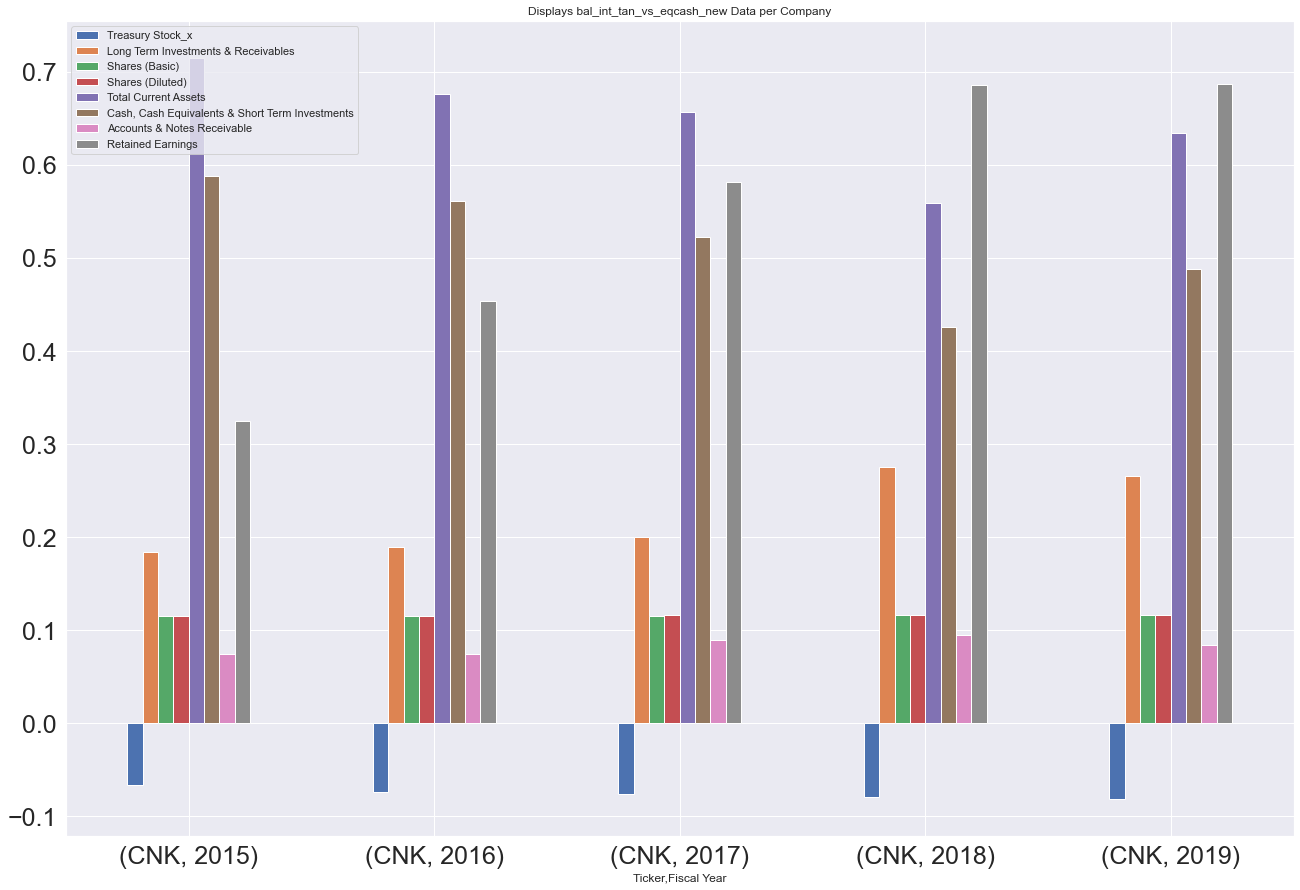

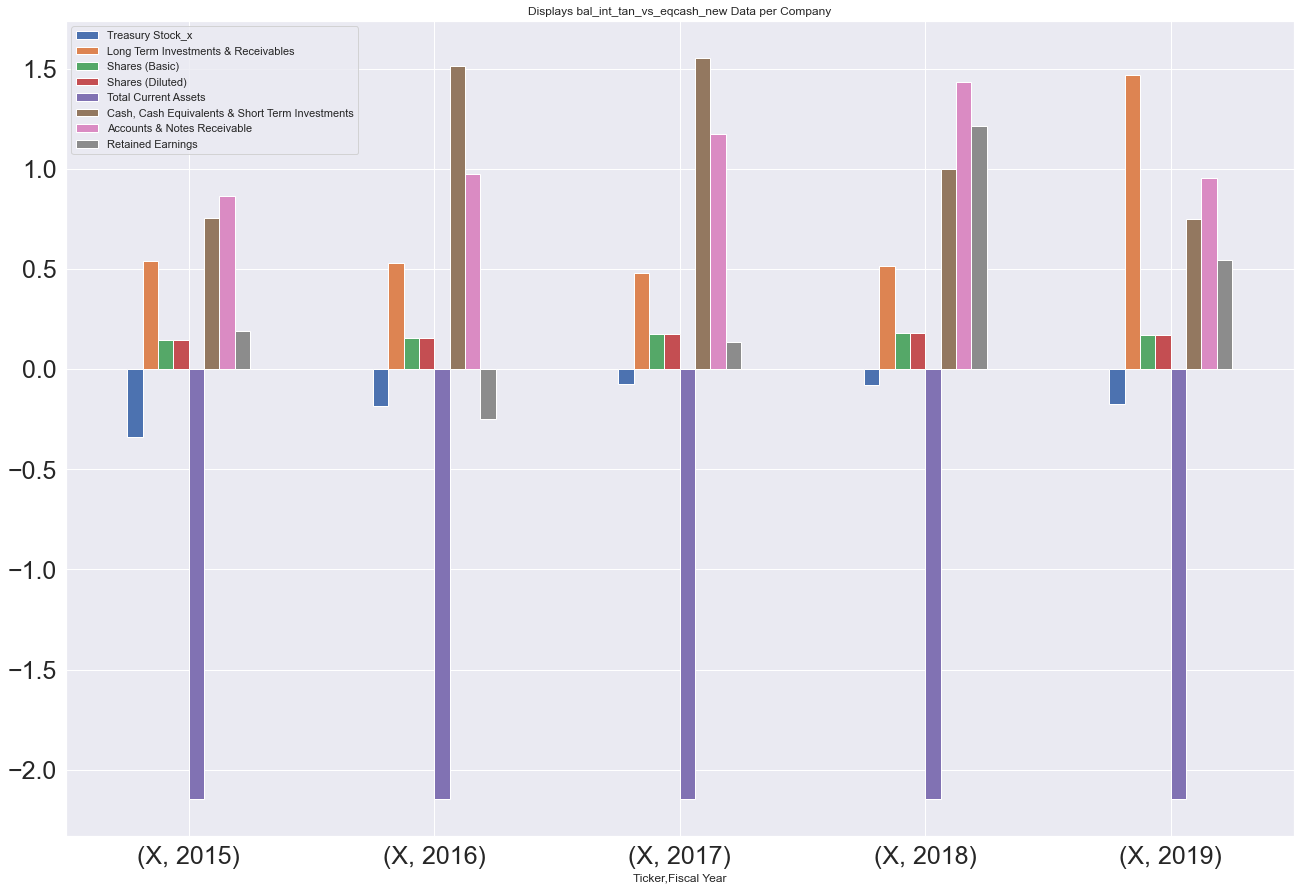

In [168]:
bal_int_tan_vs_eqcash_new.groupby(level=0).plot.bar(title="Displays bal_int_tan_vs_eqcash_new Data per Company",figsize=(22,15),rot =360, grid =True, fontsize = 25)

In [169]:
# using loc funtion to create tech dataframe


bal_int_tan_vs_eqcash_tech = bal_int_tan_vs_eqcash.loc[['AME','IBM']]
bal_int_tan_vs_eqcash_tech



Treasury Stock_x  Long Term Investments & Receivables  \
Ticker Fiscal Year                                                          
AME    2015                -0.885430                             0.177481   
       2016                -1.211539                             0.146283   
       2017                -1.209135                             0.239129   
       2018                -1.570184                             0.256210   
       2019                -1.574464                             0.279790   
IBM    2015                -2.147484                            -2.147484   
       2016                -2.147484                            -2.147484   
       2017                -2.147484                            -2.147484   
       2018                -2.147484                            -2.147484   
       2019                -2.147484                             2.074000   

                    Shares (Basic)  Shares (Diluted)  Total Current Assets  \
Ticker Fiscal Year                                                           
AME    2015               0.239906          0.241586              1.618827   
       2016               0.232593          0.233730              1.928190   
       2017               0.230229          0.231845              1.934655   
       2018               0.230823          0.232712              1.836144   
       2019               0.227759          0.229395              2.025771   
IBM    2015               0.978745          0.982700             -2.147484   
       2016               0.955423          0.958714             -2.147484   
       2017               0.932828          0.937386             -2.147484   
       2018               0.912048          0.916316             -2.147484   
       2019               0.887235          0.892813             -2.147484   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
AME    2015                                                0.381005   
       2016                                                0.717259   
       2017                                                0.646300   
       2018                                                0.353975   
       2019                                                0.393030   
IBM    2015                                               -2.147484   
       2016                                               -2.147484   
       2017                                               -2.147484   
       2018                                               -2.147484   
       2019                                               -2.147484   

                    Accounts & Notes Receivable  Retained Earnings  
Ticker Fiscal Year                                                  
AME    2015                            0.603295          -2.147484  
       2016                            0.592326          -2.147484  
       2017                            0.668176          -2.147484  
       2018                            0.732839          -2.147484  
       2019                            0.744760          -2.147484  
IBM    2015                           -2.147484          -2.147484  
       2016                           -2.147484          -2.147484  
       2017                           -2.147484          -2.147484  
       2018                           -2.147484          -2.147484  
       2019                           -2.147484          -2.147484

Ticker
AME    AxesSubplot(0.125,0.125;0.775x0.755)
IBM    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

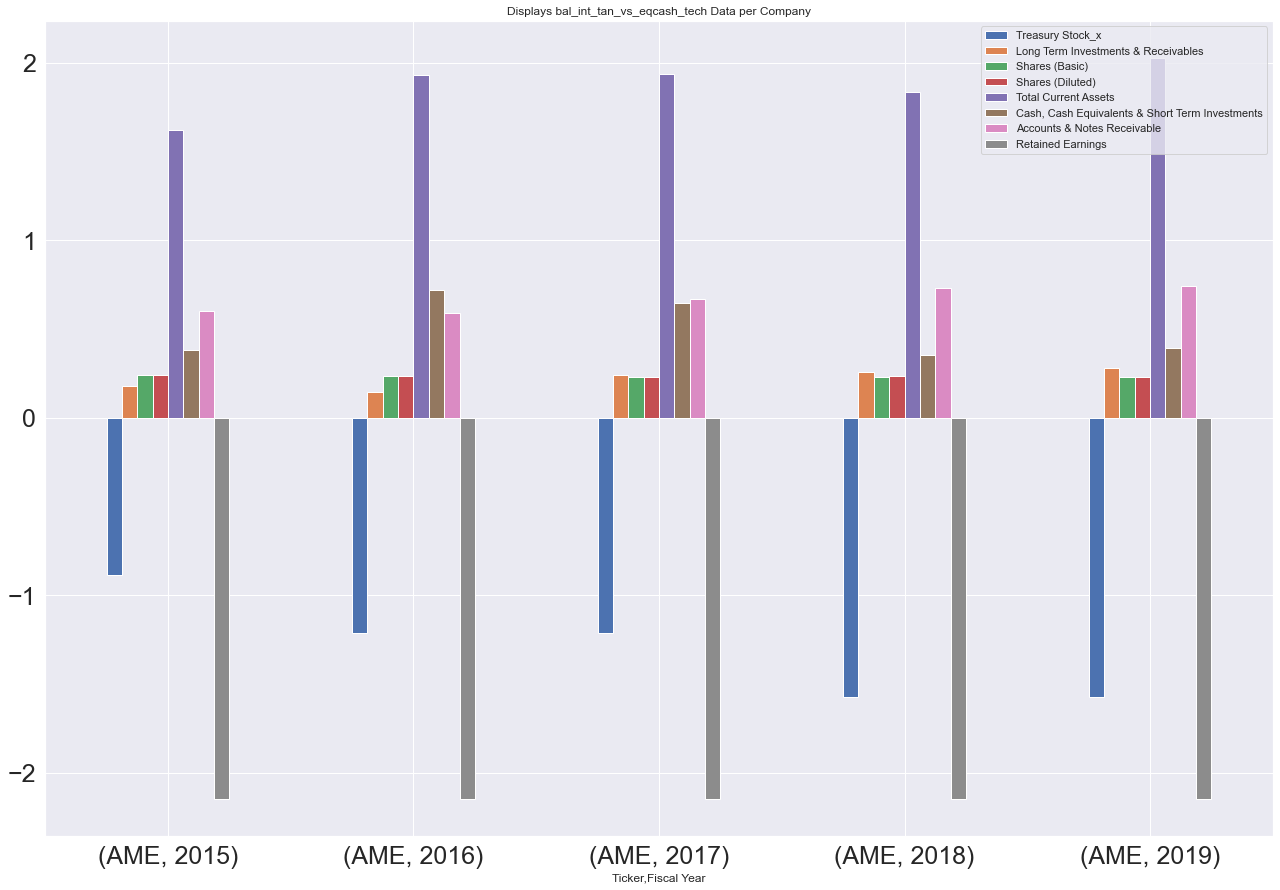

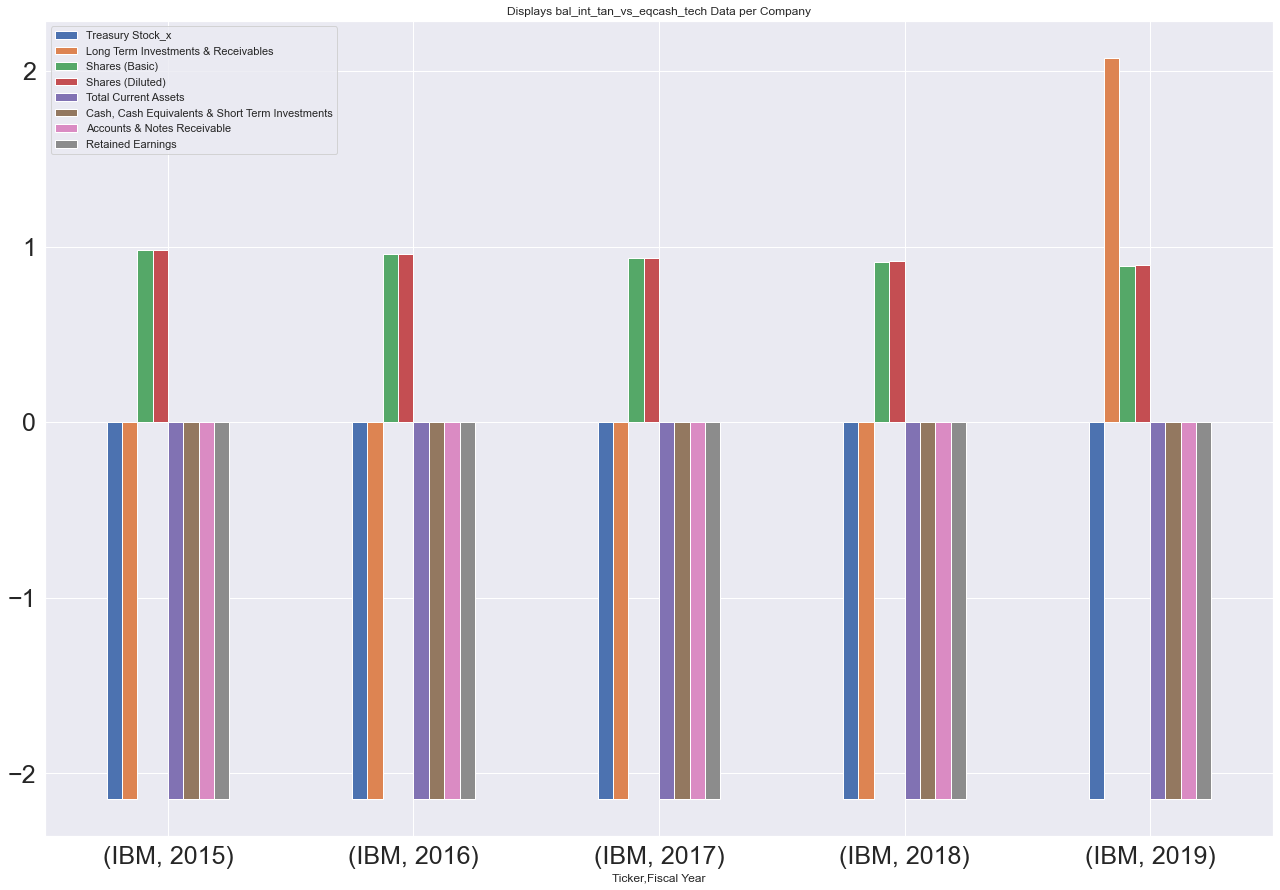

In [170]:
bal_int_tan_vs_eqcash_tech.groupby(level=0).plot.bar(title="Displays bal_int_tan_vs_eqcash_tech Data per Company",figsize=(22,15),rot =360, grid =True, fontsize = 25)

In [171]:
# using merge funtion to create bal_tan_vs_neg_cash dataframe


bal_tan_vs_neg_cash = merge_df(balance_data_neg, balance_sheet_tanglibles)
bal_tan_vs_neg_cash



Inventories  Share Capital & Additional Paid-In Capital  \
Ticker Fiscal Year                                                            
AME    2015            0.514451                                    0.570894   
       2016            0.492104                                    0.606758   
       2017            0.540504                                    0.663525   
       2018            0.624744                                    0.709383   
       2019            0.624567                                    0.835483   
IBM    2015            1.551000                                   -2.147484   
       2016            1.553000                                   -2.147484   
       2017            1.583000                                   -2.147484   
       2018            1.682000                                   -2.147484   
       2019            1.619000                                   -2.147484   
CNK    2015            0.015954                                    1.113339   
       2016            0.016961                                    1.128563   
       2017            0.017507                                    1.141209   
       2018            0.019319                                    1.155545   
       2019            0.021686                                    1.170161   
X      2015            2.074000                                   -2.147484   
       2016            1.573000                                   -2.147484   
       2017            1.738000                                   -2.147484   
       2018            2.092000                                   -2.147484   
       2019            1.785000                                   -2.147484   

                    Payables & Accruals  Total Liabilities  Long Term Debt  \
Ticker Fiscal Year                                                           
AME    2015                    0.639097          -0.889143        1.553116   
       2016                    0.645520          -0.450806        2.062644   
       2017                    0.830540          -0.526536        1.866166   
       2018                    0.762599           0.125399       -2.147484   
       2019                    0.771591           0.434100       -2.147484   
IBM    2015                   -2.147484           1.582719       -2.147484   
       2016                   -2.147484           0.291752       -2.147484   
       2017                   -2.147484           0.256818       -2.147484   
       2018                   -2.147484          -0.921182       -2.147484   
       2019                   -2.147484          -1.942986       -2.147484   
CNK    2015                    0.403453          -1.279283        1.981882   
       2016                    0.406330          -1.261294        2.016722   
       2017                    0.424430          -1.229762        2.031532   
       2018                    0.439067          -1.269246        2.005094   
       2019                    0.455921           0.084728       -2.147484   
X      2015                    1.923000          -1.859935       -2.147484   
       2016                    2.087000          -1.704935       -2.147484   
       2017                   -2.147484          -2.048935       -2.147484   
       2018                   -2.147484          -1.810935       -2.147484   
       2019                   -2.147484          -1.074935       -2.147484   

                    Shares (Diluted)  Total Liabilities & Equity  \
Ticker Fiscal Year                                                 
AME    2015                 0.241586                   -1.929485   
       2016                 0.233730                   -1.489261   
       2017                 0.231845                   -0.793871   
       2018                 0.232712                    0.072353   
       2019                 0.229395                    1.254624   
IBM    2015                 0.982700                   -1.174150   
       2016         

In [172]:
# using loc funtion to create tech dataframe


bal_tan_vs_neg_cash_tech = bal_tan_vs_neg_cash.loc[['AME','IBM']]
bal_tan_vs_neg_cash_tech



Inventories  Share Capital & Additional Paid-In Capital  \
Ticker Fiscal Year                                                            
AME    2015            0.514451                                    0.570894   
       2016            0.492104                                    0.606758   
       2017            0.540504                                    0.663525   
       2018            0.624744                                    0.709383   
       2019            0.624567                                    0.835483   
IBM    2015            1.551000                                   -2.147484   
       2016            1.553000                                   -2.147484   
       2017            1.583000                                   -2.147484   
       2018            1.682000                                   -2.147484   
       2019            1.619000                                   -2.147484   

                    Payables & Accruals  Total Liabilities  Long Term Debt  \
Ticker Fiscal Year                                                           
AME    2015                    0.639097          -0.889143        1.553116   
       2016                    0.645520          -0.450806        2.062644   
       2017                    0.830540          -0.526536        1.866166   
       2018                    0.762599           0.125399       -2.147484   
       2019                    0.771591           0.434100       -2.147484   
IBM    2015                   -2.147484           1.582719       -2.147484   
       2016                   -2.147484           0.291752       -2.147484   
       2017                   -2.147484           0.256818       -2.147484   
       2018                   -2.147484          -0.921182       -2.147484   
       2019                   -2.147484          -1.942986       -2.147484   

                    Shares (Diluted)  Total Liabilities & Equity  \
Ticker Fiscal Year                                                 
AME    2015                 0.241586                   -1.929485   
       2016                 0.233730                   -1.489261   
       2017                 0.231845                   -0.793871   
       2018                 0.232712                    0.072353   
       2019                 0.229395                    1.254624   
IBM    2015                 0.982700                   -1.174150   
       2016                 0.958714                    1.503883   
       2017                 0.937386                    0.800948   
       2018                 0.916316                   -1.171052   
       2019                 0.892813                    1.860145   

                    Total Current Liabilities  Total Current Assets  \
Ticker Fiscal Year                                                    
AME    2015                          1.024021              1.618827   
       2016                          0.924441              1.928190   
       2017                          1.138663              1.934655   
       2018                          1.258704              1.836144   
       2019                          1.425858              2.025771   
IBM    2015                         -2.147484             -2.147484   
       2016                         -2.147484             -2.147484   
       2017                         -2.147484             -2.147484   
       2018                         -2.147484             -2.147484   
       2019                         -2.147484             -2.147484   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
AME    2015                                                0.381005   
       2016                                                0.717259   
       2017                                                0.646300   
       2018                                                0.353975   
       2019                           

Ticker
AME    AxesSubplot(0.125,0.125;0.775x0.755)
IBM    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

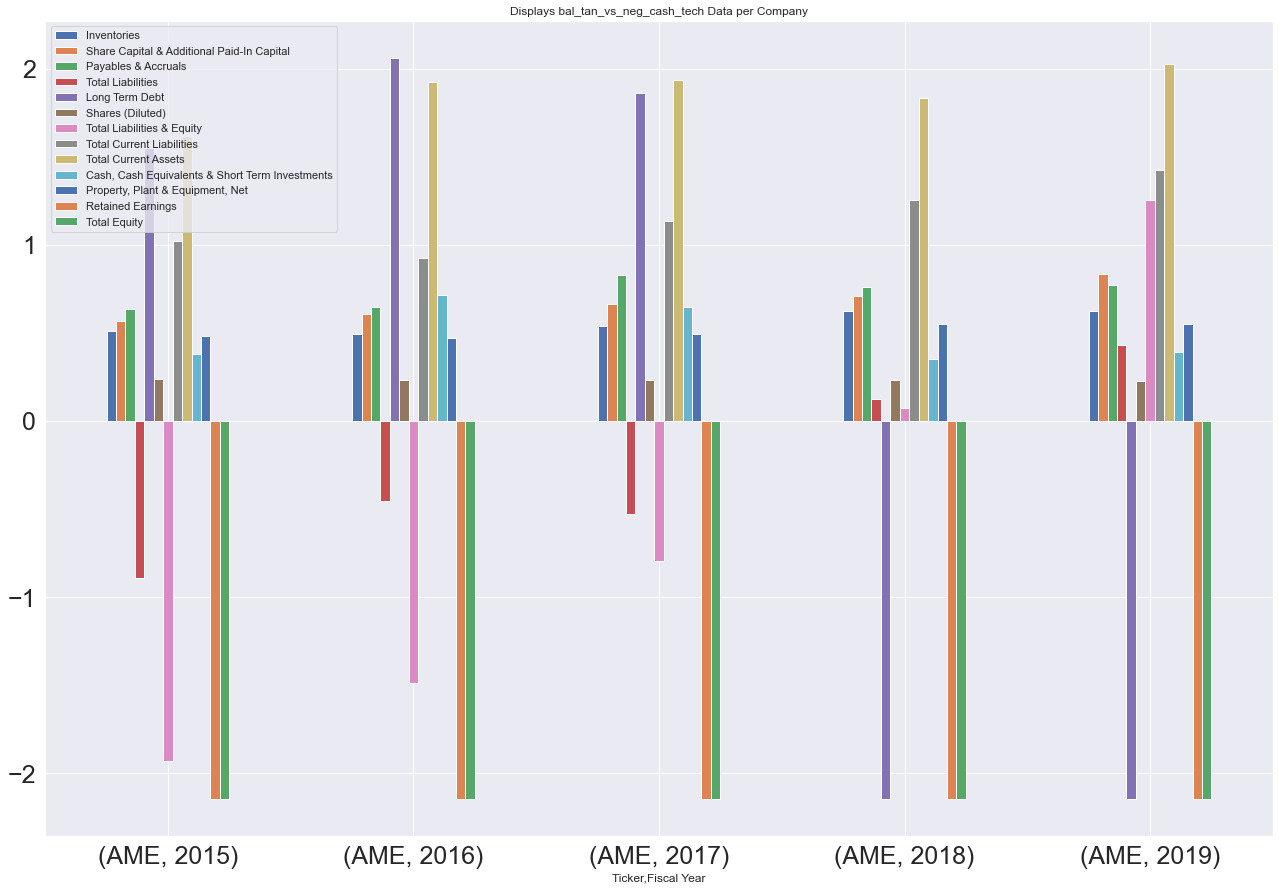

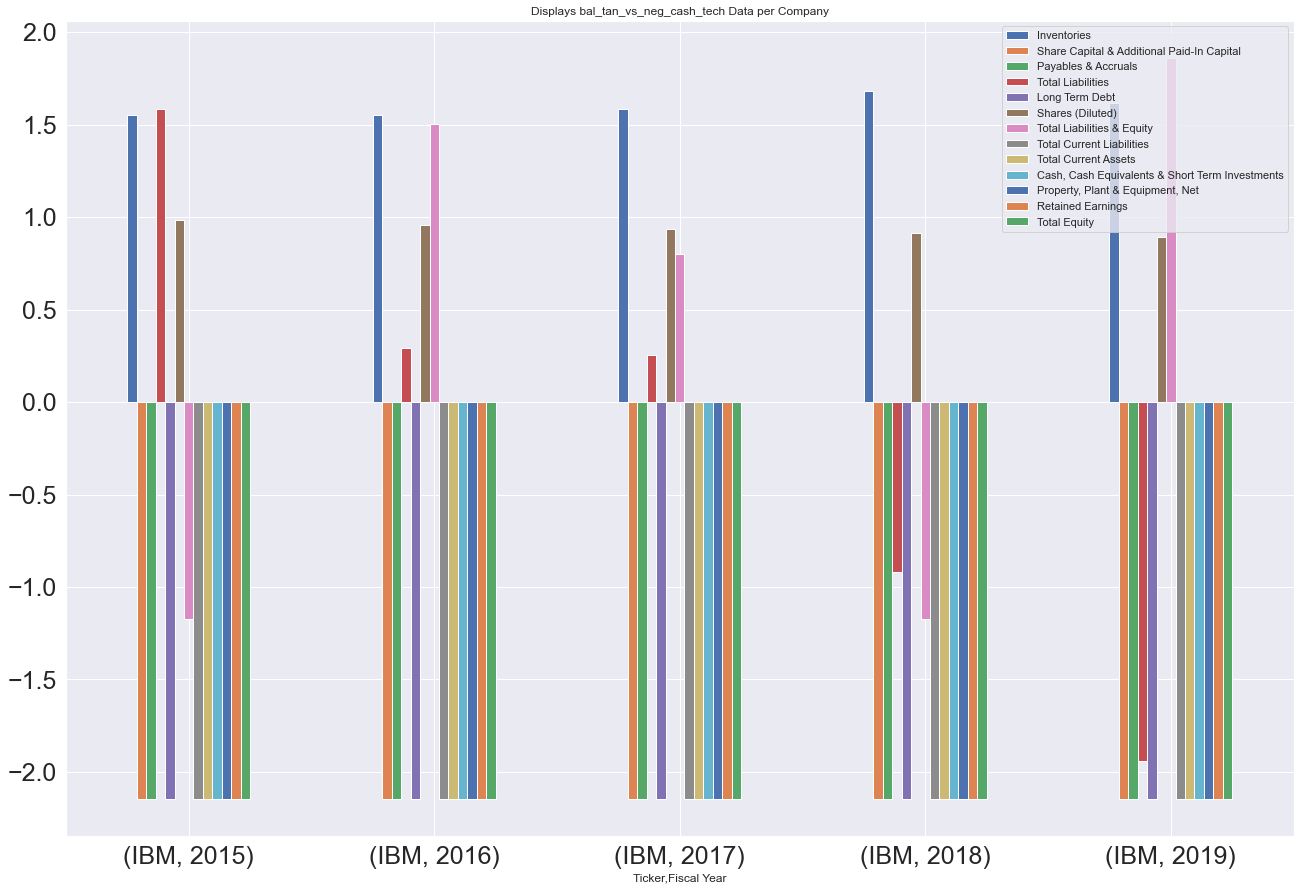

In [173]:
bal_tan_vs_neg_cash_tech.groupby(level=0).plot.bar(title="Displays bal_tan_vs_neg_cash_tech Data per Company",figsize=(22,15),rot =360, grid =True, fontsize = 25)

In [174]:
# using loc funtion to create new dataframe



bal_tan_vs_neg_cash_new = bal_tan_vs_neg_cash.loc[['CNK','X']]

bal_tan_vs_neg_cash_new


Inventories  Share Capital & Additional Paid-In Capital  \
Ticker Fiscal Year                                                            
CNK    2015            0.015954                                    1.113339   
       2016            0.016961                                    1.128563   
       2017            0.017507                                    1.141209   
       2018            0.019319                                    1.155545   
       2019            0.021686                                    1.170161   
X      2015            2.074000                                   -2.147484   
       2016            1.573000                                   -2.147484   
       2017            1.738000                                   -2.147484   
       2018            2.092000                                   -2.147484   
       2019            1.785000                                   -2.147484   

                    Payables & Accruals  Total Liabilities  Long Term Debt  \
Ticker Fiscal Year                                                           
CNK    2015                    0.403453          -1.279283        1.981882   
       2016                    0.406330          -1.261294        2.016722   
       2017                    0.424430          -1.229762        2.031532   
       2018                    0.439067          -1.269246        2.005094   
       2019                    0.455921           0.084728       -2.147484   
X      2015                    1.923000          -1.859935       -2.147484   
       2016                    2.087000          -1.704935       -2.147484   
       2017                   -2.147484          -2.048935       -2.147484   
       2018                   -2.147484          -1.810935       -2.147484   
       2019                   -2.147484          -1.074935       -2.147484   

                    Shares (Diluted)  Total Liabilities & Equity  \
Ticker Fiscal Year                                                 
CNK    2015                 0.115399                   -0.168470   
       2016                 0.115783                    0.011666   
       2017                 0.116059                    0.175926   
       2018                 0.116342                    0.186871   
       2019                 0.116606                    1.533050   
X      2015                 0.146094                    0.577065   
       2016                 0.156673                    0.570065   
       2017                 0.176520                    1.272065   
       2018                 0.178461                   -1.902902   
       2019                 0.171418                   -1.276902   

                    Total Current Liabilities  Total Current Assets  \
Ticker Fiscal Year                                                    
CNK    2015                          0.439793              0.715151   
       2016                          0.443225              0.676317   
       2017                          0.468913              0.657570   
       2018                          0.474689              0.559030   
       2019                          0.708800              0.634990   
X      2015                         -2.147484             -2.147484   
       2016                         -2.147484             -2.147484   
       2017                         -2.147484             -2.147484   
       2018                         -2.147484             -2.147484   
       2019                         -2.147484             -2.147484   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
CNK    2015                                                0.588539   
       2016                                                0.561235   
       2017                                                0.522547   
       2018                                                0.426222   
       2019                           

Ticker
CNK    AxesSubplot(0.125,0.125;0.775x0.755)
X      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

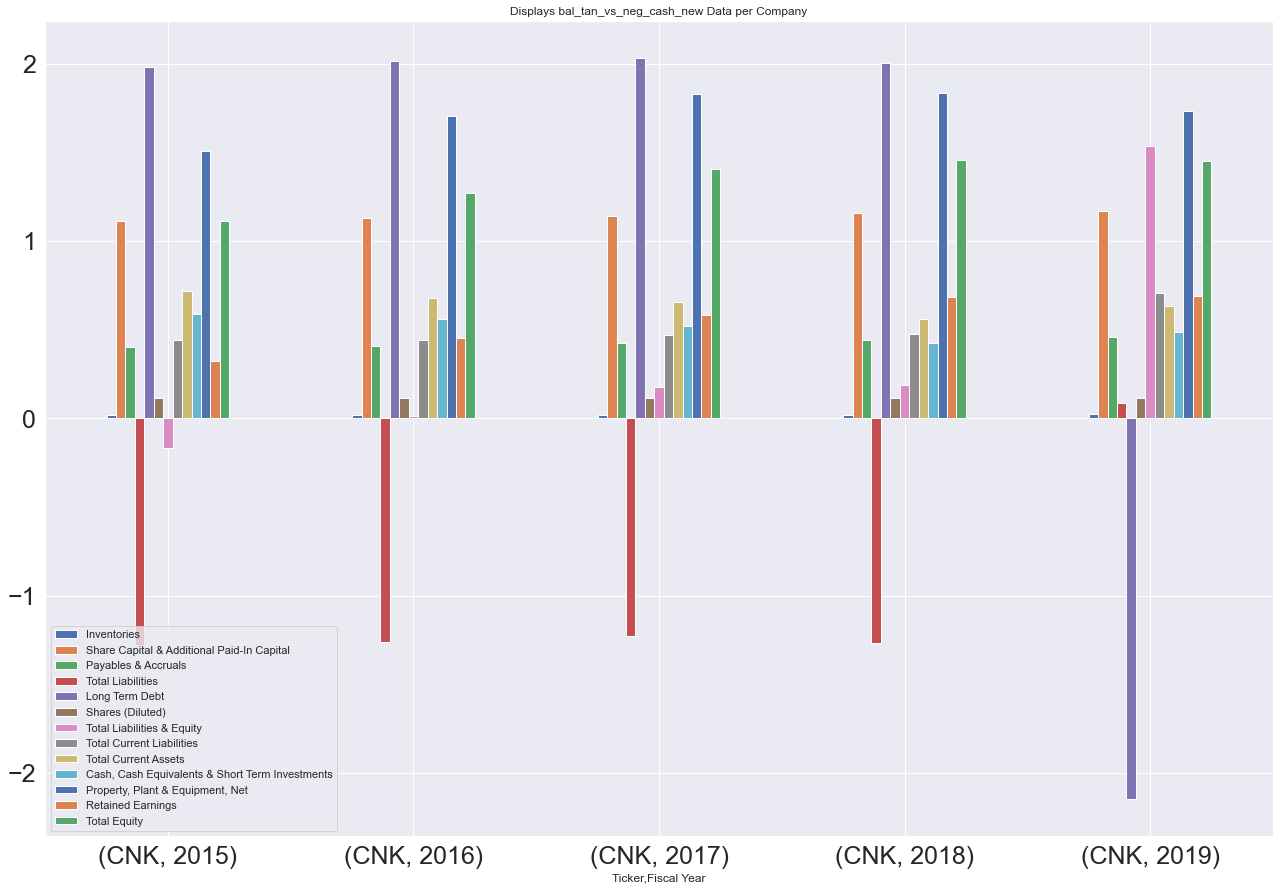

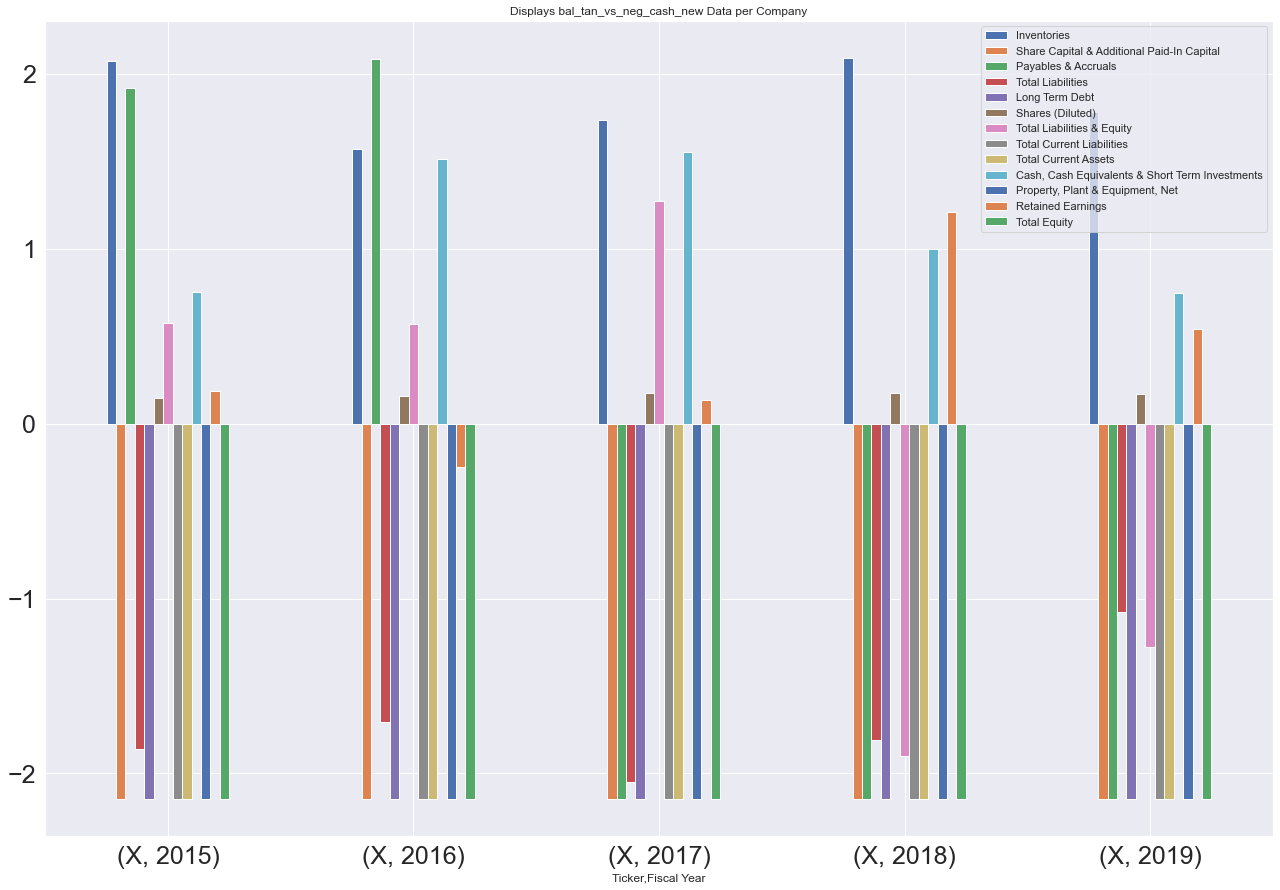

In [175]:
bal_tan_vs_neg_cash_new.groupby(level=0).plot.bar(title="Displays bal_tan_vs_neg_cash_new Data per Company",figsize=(22,15),rot =360, grid =True, fontsize = 25)

## Using custom functions on custom made dataframes

In [176]:
"""
This calls our custom made indicator function (Not_ncavps) and our custom made dataframe (balance_cash_vs_neg_cash_tech)
"""

Not_ncavps(balance_cash_vs_neg_cash_tech)


jncavps
Ticker Fiscal Year           
AME    2016         -0.570541
       2017          0.065690
       2018         -2.303062
       2019          1.003783
IBM    2015         -0.551751
       2016         -0.865310
       2017         -0.383833
       2018        -10.204479
       2019          1.025968

Ticker
AME    AxesSubplot(0.125,0.125;0.775x0.755)
IBM    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

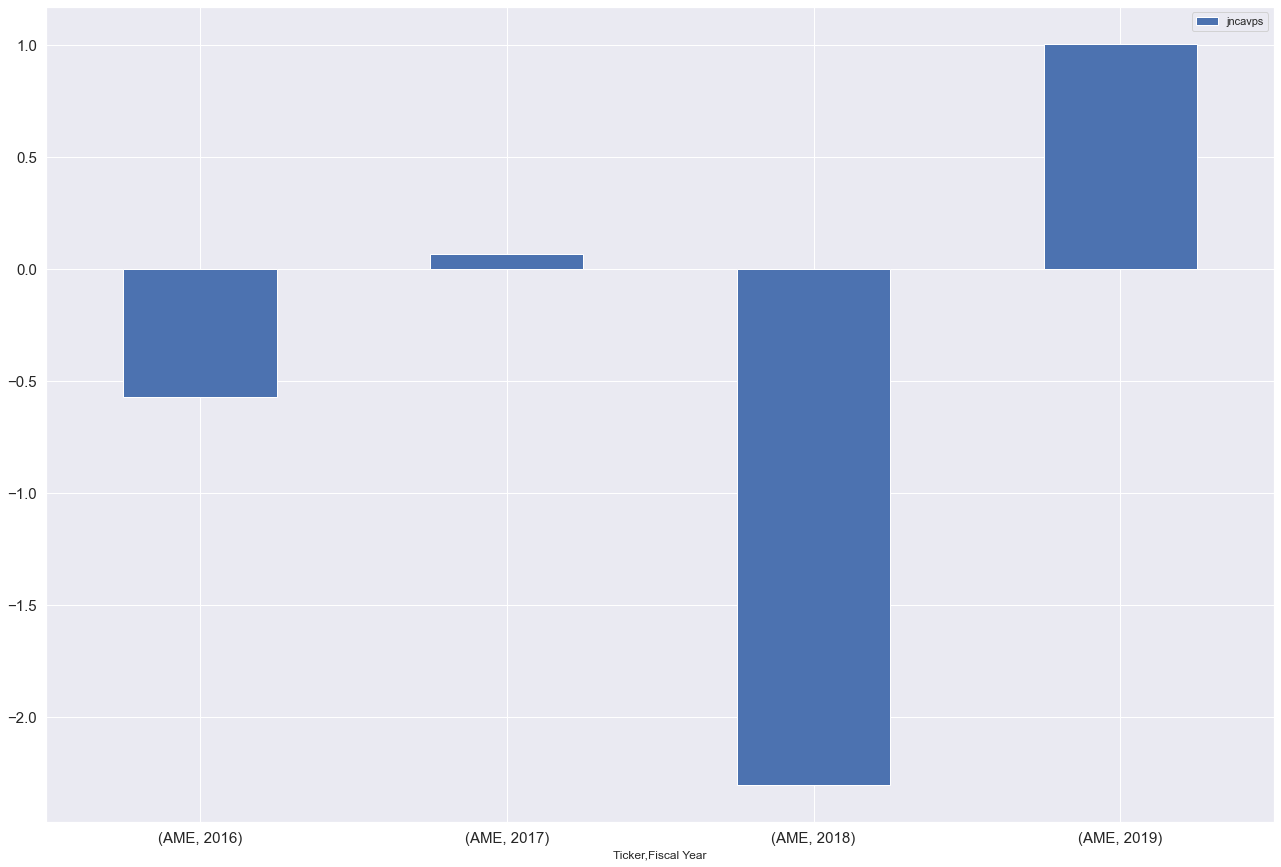

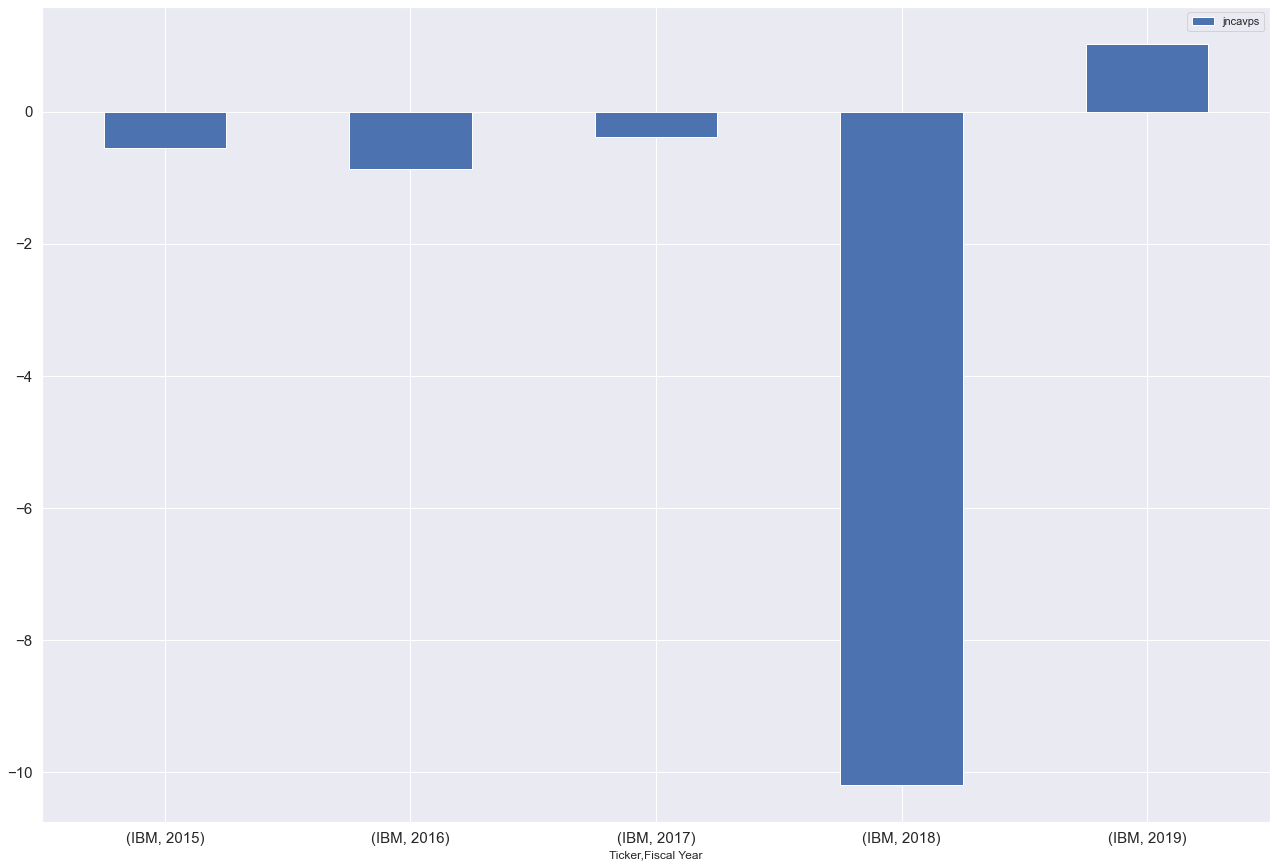

In [199]:
Not_ncavps(balance_cash_vs_neg_cash_tech).groupby(level=0).plot.bar(figsize=(22,15),rot =360, grid =True, fontsize = 15)

In [178]:
"""
This calls our custom made indicator function (Not_ncavps) and our custom made dataframe (balance_cash_vs_neg_cash_dog)
"""



Not_ncavps(balance_cash_vs_neg_cash_dog)

jncavps
Ticker Fiscal Year          
CNK    2016        -0.153477
       2017        -0.220621
       2018         0.081488
       2019        -7.591540
X      2015        -3.496636
       2016        -0.112388
       2017        -0.036355
       2018        -0.073625
       2019        -0.168831

In [198]:
Not_ncavps(balance_cash_vs_neg_cash_dog)

jncavps
Ticker Fiscal Year          
CNK    2016        -0.153477
       2017        -0.220621
       2018         0.081488
       2019        -7.591540
X      2015        -3.496636
       2016        -0.112388
       2017        -0.036355
       2018        -0.073625
       2019        -0.168831

In [180]:
"""
This calls our custom made indicator function (make_book_price) and our custom made dataframe (bal_int_tan_vs_eqcash_tech)
"""

make_book_price(bal_int_tan_vs_eqcash_tech)


book_price
Ticker Fiscal Year            
AME    2016           0.231138
       2017           0.011511
       2018          -0.054455
       2019           0.119228
IBM    2015          -1.247459
       2016           0.025019
       2017           0.022753
       2018           0.022994
       2019           0.026324

In [195]:
make_book_price(bal_int_tan_vs_eqcash_tech)

book_price
Ticker Fiscal Year            
AME    2016           0.231138
       2017           0.011511
       2018          -0.054455
       2019           0.119228
IBM    2015          -1.247459
       2016           0.025019
       2017           0.022753
       2018           0.022994
       2019           0.026324

In [196]:
"""
This calls our custom made indicator function (make_book_price) and our custom made dataframe (bal_int_tan_vs_eqcash_dog)
"""

make_book_price(balance_cash_vs_neg_cash_dog)


book_price
Ticker Fiscal Year            
CNK    2016          -0.057438
       2017          -0.030031
       2018          -0.151923
       2019           0.133307
X      2015          -3.699302
       2016          -0.067523
       2017          -0.112435
       2018          -0.010876
       2019           0.041087

# After cleaning and structuring my data I used my extracted sections and features to conclude value in four companies in varying sectors. After displaying our data and applying the custom-made functions. I offer AME and CNK and the superior investment opportunities for the long term investor.